# Home Credit Risk Default Analysis

# Business Problem Statement
The problem is that Home Credit currently serves clients who cannot be served by the traditional banking system or other traditional financial institutions. These clients cannot be served by traditional institutions because they are usually from underprivileged populations. This results in them having insufficient/non-existent credit history. It also makes it difficult for Home Credit to utilize traditional measures like FICO Scores to see if a client can repay their loan.

If Home Credit approves a loan for a client and they cannot pay the loan back, then it is a financial loss for Home Credit. However, if a client can pay back a loan but is denied, it represents a loss of potential revenue for Home Credit. Both scenarios ultimately affect Home Credit’s ability to operate efficiently because Home Credit either loses money from bad loans or forgoes lending opportunities.

# Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np

# Read the datasets
train_df_init = pd.read_csv('train_clean.csv')
test_df_init = pd.read_csv('test_clean_01.csv')

### Store both train and test data as dataframes using Pandas

> Add blockquote



In [ ]:
# Copy the data for backup
train_df = train_df_init.copy()
test_df = test_df_init.copy()

# Get the column names
print("Train DataFrame columns:", train_df.columns.tolist())
print("Test DataFrame columns:", test_df.columns.tolist())

# Extract the target column from train_df and store it in a label array
y_train = train_df['TARGET'].to_numpy()

# Remove the target column from train_df
train_df = train_df.drop(columns=['TARGET'])

Train DataFrame columns: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_ME

### Imbalaced Intrinsicity

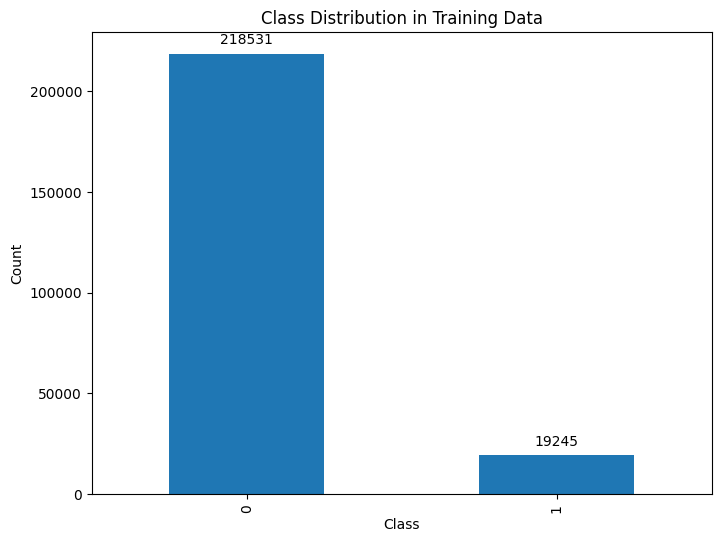

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_train_split is the target labels for training data
y_train_df = pd.DataFrame({'Class': y_train})

# Count the occurrences of each class
class_counts = y_train_df['Class'].value_counts().sort_index()

# Plot the bar chart
ax = class_counts.plot(kind='bar', figsize=(8, 6), color='#1f77b4')

# Adding title and labels
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")

# Annotating the values on top of the bars
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Annotate the value at the top of the bar
    ax.annotate(f'{int(height)}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # Offset the text
                textcoords='offset points',
                ha='center', va='bottom')

# Show the plot
plt.show()

### Non-Linear Separability

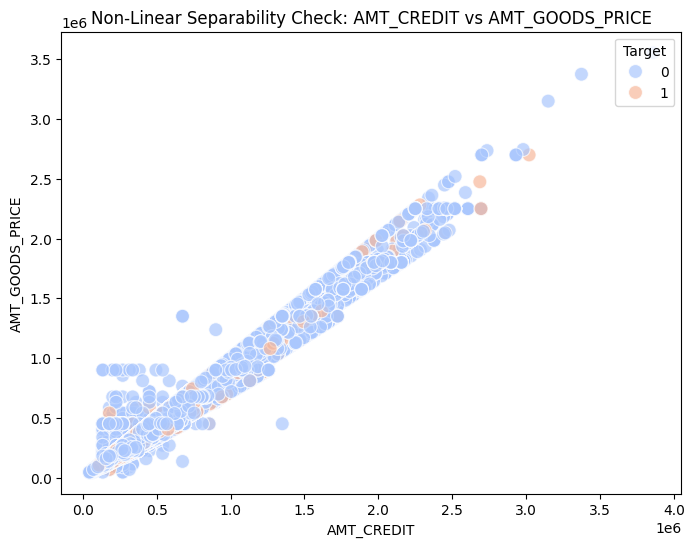

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'AMT_CREDIT'
feature2 = 'AMT_GOODS_PRICE'

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df_init[feature1], y=train_df_init[feature2], hue=train_df_init['TARGET'], palette='coolwarm', s=100, alpha=0.7)

# Adding labels and title
plt.title(f"Non-Linear Separability Check: {feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title="Target", loc='upper right')

# Show the plot
plt.show()


### Process categorical features using one-hot encoding and Convert dataframes into Numpy array

In [ ]:
# Identify columns of features that are categorical
cat_cols_train = train_df.select_dtypes(include='object').columns
cat_cols_test = test_df.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
train_df = pd.get_dummies(train_df, columns=cat_cols_train, drop_first=False)
test_df = pd.get_dummies(test_df, columns=cat_cols_test, drop_first=False)

# Align the train and test sets by matching their columns
train_df, test_df = train_df.align(test_df, join='outer', axis=1, fill_value=0)

# Convert numeric columns to numeric types (int or float)
# 'errors="coerce"' will convert invalid parsing to NaN, so we handle any possible issues
train_df = train_df.apply(pd.to_numeric, downcast='float')
test_df = test_df.apply(pd.to_numeric, downcast='float')

# Get the column names
print("Train DataFrame columns:", train_df.columns.tolist())
print("Test DataFrame columns:", test_df.columns.tolist())

# If you want to convert the DataFrame into NumPy arrays for analysis:
x_train = train_df.to_numpy()
x_test = test_df.to_numpy()

Train DataFrame columns: ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_MEDI', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'CODE_GENDER_M', 'COMMONAREA_MEDI', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'HOUR_APPR_PROCESS_START', 'House_Attribute_Low_Variance', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NAME_CONTRACT_TYPE_Cash loans', 'NA

## Model Training

In [ ]:
# Load models from sklearn package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [ ]:
# Split the original training data into a new train and validation set
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

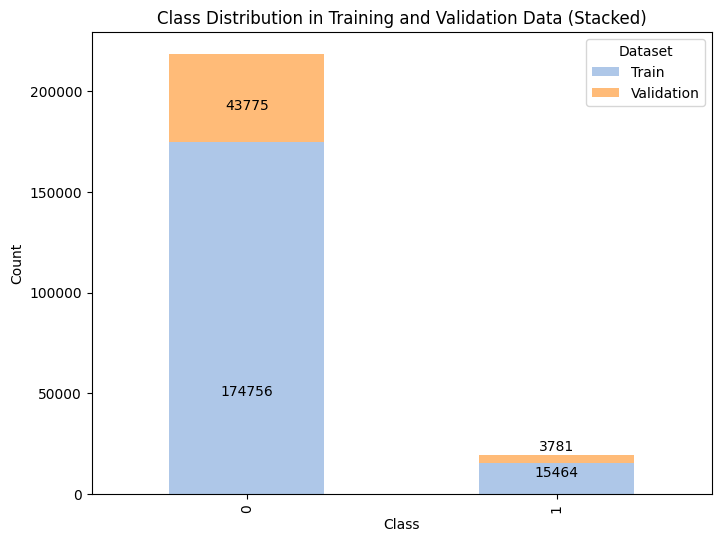

In [ ]:
# Create DataFrames with labels and a 'Dataset' column
y_train_split_pd = pd.DataFrame({'Class': y_train_split, 'Dataset': 'Train'})
y_val_split_pd = pd.DataFrame({'Class': y_val_split, 'Dataset': 'Validation'})

# Combine both DataFrames
combined_df = pd.concat([y_train_split_pd, y_val_split_pd])

# Count the occurrences of each class in the datasets
class_counts = combined_df.groupby(['Class', 'Dataset']).size().unstack(fill_value=0)

# Plot the stacked bar chart with custom colors
ax = class_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#aec7e8', '#ffbb78'])

# Adding title and labels
plt.title("Class Distribution in Training and Validation Data (Stacked)")
plt.xlabel("Class")
plt.ylabel("Count")

# Annotating the values on top of the stacked bars
for p in ax.patches:
    # Get the height of each segment
    height = p.get_height()
    # Get the x-coordinate of the bar
    x = p.get_x() + p.get_width() / 2
    # Annotate the value at the top of the bar
    ax.annotate(f'{int(height)}',
                xy=(x, p.get_y() + height/4),
                xytext=(0, 5),  # Adjust the text position
                textcoords='offset points',
                ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
# 1. Logistic Regression -19s
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(x_train_split, y_train_split)
y_train_pred_log_reg = log_reg.predict(x_train_split)  # Predict on training set
y_val_pred_log_reg = log_reg.predict(x_val_split)  # Predict on validation set
log_reg_val_acc = accuracy_score(y_val_split, y_val_pred_log_reg)  # Evaluate on validation set
print("Logistic Regression Validation Accuracy:", log_reg_val_acc)

# We don't need to worry about "ConvergenceWarning: lbfgs failed to converge (status=1)". This is just saying the result has not converged but as we specify the max iterations is 100, so it stops before converging

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation Accuracy: 0.9204937337034234


Runtime: 19 Seconds

The Logistic Regression has an accuracy of 92.049% on the validation set. This indicates that the model is doing a slightly better job at prediction than a majority classifier. Majority Classifier is 91.906% in terms of accuracy.


In [ ]:
# 2. Logistic Regression with L1 Regularization (Lasso) --55s
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_l1.fit(x_train_split, y_train_split)
y_train_pred_log_reg_l1 = log_reg_l1.predict(x_train_split)
y_val_pred_l1 = log_reg_l1.predict(x_val_split)
log_reg_l1_val_acc = accuracy_score(y_val_split, y_val_pred_l1)
print("Logistic Regression (L1 - Lasso) Validation Accuracy:", log_reg_l1_val_acc)

Logistic Regression (L1 - Lasso) Validation Accuracy: 0.9201783160905038


Runtime: 55 Seconds

Lasso Regression can be utilized to perform feature selection by penalizing/removing some columns while generating predictions. However, Lasso Regression has a validation accuracy of 92.018%. This is slightly less than regular regression which was 92.049%.
It should be noted however that this model is still doing slightly better than a majority classifier which has an accuracy of 91.906%.


In [ ]:
# 3. Random Forest Classifier --1min
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_split, y_train_split)
y_train_pred_rf = rf_clf.predict(x_train_split)
y_val_pred_rf = rf_clf.predict(x_val_split)
rf_val_acc = accuracy_score(y_val_split, y_val_pred_rf)
print("Random Forest Validation Accuracy:", rf_val_acc)

Random Forest Validation Accuracy: 0.920472705862562


Runtime: 1 min

The Random Forest has an accuracy of 92.047% on the validation set which is slightly better than L1-Penalized Logistic Regression. It also performs slightly better than a majority classifier as well. (Majority Classifier Accuracy is 91.906%)

A hyperparameter of 100 trees has been used to help prevent overfitting. If too many trees are used, then the model will overfit to the training data and not adjust to new data. (This is especially a problem since the classes are heavily imbalanced.)


In [ ]:
# 4. Naive Bayes Classifier (GaussianNB) -- 10s
nb_clf = GaussianNB()
nb_clf.fit(x_train_split, y_train_split)
y_train_pred_nb = nb_clf.predict(x_train_split)
y_val_pred_nb = nb_clf.predict(x_val_split)
nb_val_acc = accuracy_score(y_val_split, y_val_pred_nb)
print("Naive Bayes Validation Accuracy:", nb_val_acc)

Naive Bayes Validation Accuracy: 0.9204937337034234


Runtime: 10 seconds

The Naive Bayes Model had a validation set accuracy of 92.049% on the train set. This shows that this model is doing slightly better than a Majority Classifier. (Majority Classifier is 91.906%)

This is quite impressive considering that Naive Bayes makes the Naive Assumption that all of the columns in a dataset are independent.


In [ ]:
# 5. Decision Tree Classifier --33s
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train_split, y_train_split)
y_train_pred_dt = dt_clf.predict(x_train_split)
y_val_pred_dt = dt_clf.predict(x_val_split)
dt_val_acc = accuracy_score(y_val_split, y_val_pred_dt)
print("Decision Tree Validation Accuracy:", dt_val_acc)

Decision Tree Validation Accuracy: 0.8500294389772058


Run time 33 Seconds

Decision Tree has a low accuracy of 85%.It is less resilient than other models, which is attributed to its tendency to overfit without applying ensemble or regularization. This can be improved by hyperparameter tuning, pruning to reduce complexity or by using an ensemble technique. It is straightforward and easy to understand, although it is not as robust as the ensemble and other non-parametric techniques

In [ ]:
# 6. K-Nearest Neighbors (KNN) --12min
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train_split, y_train_split)
y_train_pred_knn = knn_clf.predict(x_train_split)
y_val_pred_knn = knn_clf.predict(x_val_split)
knn_val_acc = accuracy_score(y_val_split, y_val_pred_knn)
print("K-Nearest Neighbors (KNN) Validation Accuracy:", knn_val_acc)

K-Nearest Neighbors (KNN) Validation Accuracy: 0.9154049962149886


Run time : 12 min

KNN achieved a validation accuracy of 91.54%, which is significantly lower than the top performers  (such as Random Forest, Naive Bayes, and Logistic Regression with L1 regularisation).but still considered high. The little decline in accuracy as compared to Random Forest, Naive Bayes, and Logistic Regression may be the result of hyperparameter selection or sensitivity to feature scaling. Additionally, noise or poorly clustered data points in feature space can impair KNN performance as well. .Due to its instance-based design, it may be more susceptible to feature scaling and perform less efficiently on larger datasets with fine-tuning of hyperparameters.


In [ ]:
# 7. MLP (Neural Network) --2min
mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64, 64, 32), random_state=42, max_iter=300)
mlp_clf.fit(x_train_split, y_train_split)
y_train_pred_mlp = mlp_clf.predict(x_train_split)
y_val_pred_mlp = mlp_clf.predict(x_val_split)
mlp_val_acc = accuracy_score(y_val_split, y_val_pred_mlp)
print("MLP Classifier Validation Accuracy:", mlp_val_acc)

MLP Classifier Validation Accuracy: 0.9204937337034234


Run time : 2 min

The MLP Classifier achieved a validation accuracy of 92.05%, matching the top-performing models (Random Forest and Naive Bayes) in your analysis. With a validation accuracy of 92.05%, the MLP Classifier performs similarly to the best-performing models (Random Forest and Naive Bayes) and slightly better than Logistic Regression with L1 regularization (92.02%).
The top-performing models are quite good at identifying patterns in the data and generalizing them to validation data, as evidenced by their virtually similar validation accuracy.
There is not much of a difference between MLP and Logistic Regression (L1), suggesting that both models are almost equally successful.

MLP, Random Forest, and Naive Bayes models obtained similar validation accuracy (~92%), demonstrating they are similarly good at generalizing to new data for this task. This implies that each of these models accurately describes the underlying data structure.



In [ ]:
# 8. XGBoost Classifier --18s
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(x_train_split, y_train_split)
y_train_pred_xgb = xgb_clf.predict(x_train_split)
y_val_pred_xgb = xgb_clf.predict(x_val_split)
xgb_val_acc = accuracy_score(y_val_split, y_val_pred_xgb)
print("XGBoost Validation Accuracy:", xgb_val_acc)

XGBoost Validation Accuracy: 0.9201993439313652


Runtime: 18 seconds

The model achieves a high validation accuracy of 92% consistent with the training data.

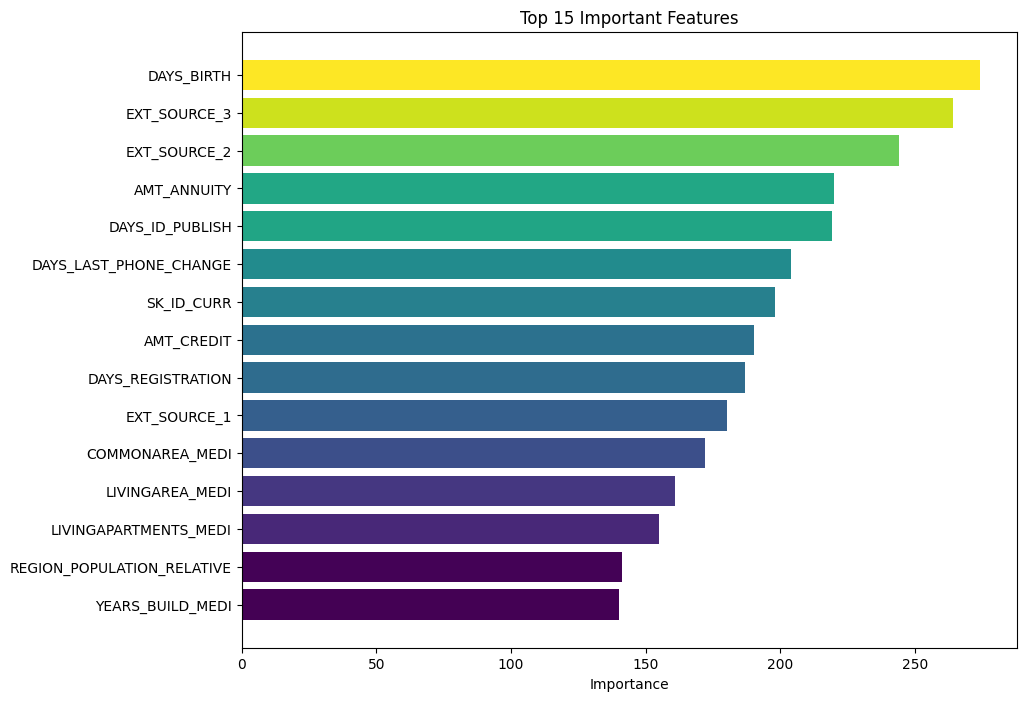

In [ ]:
# Extract feature names from the DataFrame column names
feature_names = train_df.columns.tolist()

# Extract the importance
importance = xgb_clf.get_booster().get_score(importance_type='weight')

# Convert importance to a DataFrame for easier handling
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Map the numeric feature names to real column names from train_df
# This assumes that features are indexed starting from 'f0', 'f1', ...
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: feature_names[int(x[1:])])

# Sort the values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
top_features = importance_df.head(15)

# Plotting with a color gradient
plt.figure(figsize=(10, 8))

# Normalize the feature importance values to get colors
norm = plt.Normalize(top_features['Importance'].min(), top_features['Importance'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)  # You can change 'viridis' to any other colormap

# Use the normalized importance values to get the color values for each feature
colors = plt.cm.viridis(norm(top_features['Importance']))

# Create a horizontal bar plot with the color gradient
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)


# Plot labels and title
plt.xlabel('Importance')
plt.title('Top 15 Important Features')
plt.gca().invert_yaxis()  # Highest importance on top

plt.show()


### Comparison of the Result
#### Confusion Matrix and Classification Report

In [ ]:
# Initialize dictionaries to store results
train_predictions = {}
val_predictions = {}
val_accuracies = {}

# Store training and validation predictions in dictionaries
train_predictions['Logistic Regression'] = y_train_pred_log_reg
val_predictions['Logistic Regression'] = y_val_pred_log_reg
val_accuracies['Logistic Regression'] = log_reg_val_acc

train_predictions['Logistic Regression (L1 - Lasso)'] = y_train_pred_log_reg_l1
val_predictions['Logistic Regression (L1 - Lasso)'] = y_val_pred_l1
val_accuracies['Logistic Regression (L1 - Lasso)'] = log_reg_l1_val_acc

train_predictions['Random Forest'] = y_train_pred_rf
val_predictions['Random Forest'] = y_val_pred_rf
val_accuracies['Random Forest'] = rf_val_acc

train_predictions['Naive Bayes'] = y_train_pred_nb
val_predictions['Naive Bayes'] = y_val_pred_nb
val_accuracies['Naive Bayes'] = nb_val_acc

train_predictions['Decision Tree'] = y_train_pred_dt
val_predictions['Decision Tree'] = y_val_pred_dt
val_accuracies['Decision Tree'] = dt_val_acc

train_predictions['K-Nearest Neighbors'] = y_train_pred_knn
val_predictions['K-Nearest Neighbors'] = y_val_pred_knn
val_accuracies['K-Nearest Neighbors'] = knn_val_acc

train_predictions['MLP'] = y_train_pred_mlp
val_predictions['MLP'] = y_val_pred_mlp
val_accuracies['MLP'] = mlp_val_acc

train_predictions['XGBoost'] = y_train_pred_xgb
val_predictions['XGBoost'] = y_val_pred_xgb
val_accuracies['XGBoost'] = xgb_val_acc


# Generate predicted probabilities for each model
train_prob_predictions = {
    'Logistic Regression': log_reg.predict_proba(x_train_split)[:, 1],  # Probability of class 1
    'Logistic Regression (L1 - Lasso)': log_reg_l1.predict_proba(x_train_split)[:, 1],
    'Random Forest': rf_clf.predict_proba(x_train_split)[:, 1],
    'Naive Bayes': nb_clf.predict_proba(x_train_split)[:, 1],
    'Decision Tree': dt_clf.predict_proba(x_train_split)[:, 1],
    'K-Nearest Neighbors': knn_clf.predict_proba(x_train_split)[:, 1],
    'MLP': mlp_clf.predict_proba(x_train_split)[:, 1],
    'XGBoost': xgb_clf.predict_proba(x_train_split)[:, 1]
}

val_prob_predictions = {
    'Logistic Regression': log_reg.predict_proba(x_val_split)[:, 1],
    'Logistic Regression (L1 - Lasso)': log_reg_l1.predict_proba(x_val_split)[:, 1],
    'Random Forest': rf_clf.predict_proba(x_val_split)[:, 1],
    'Naive Bayes': nb_clf.predict_proba(x_val_split)[:, 1],
    'Decision Tree': dt_clf.predict_proba(x_val_split)[:, 1],
    'K-Nearest Neighbors': knn_clf.predict_proba(x_val_split)[:, 1],
    'MLP': mlp_clf.predict_proba(x_val_split)[:, 1],
    'XGBoost': xgb_clf.predict_proba(x_val_split)[:, 1]
}

### Confusion Matrices, Classification Reports, ROC-AUC, and Log Loss for Training Data and Validation Data ###

Confusion Matrix for Logistic Regression on Training Data:


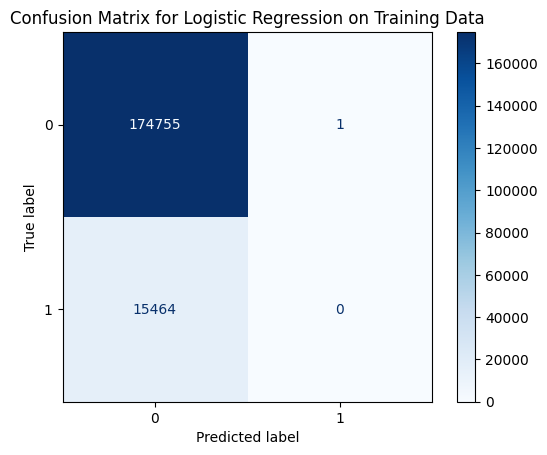

Classification Report for Logistic Regression on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.00      0.00      0.00     15464

    accuracy                           0.92    190220
   macro avg       0.46      0.50      0.48    190220
weighted avg       0.84      0.92      0.88    190220



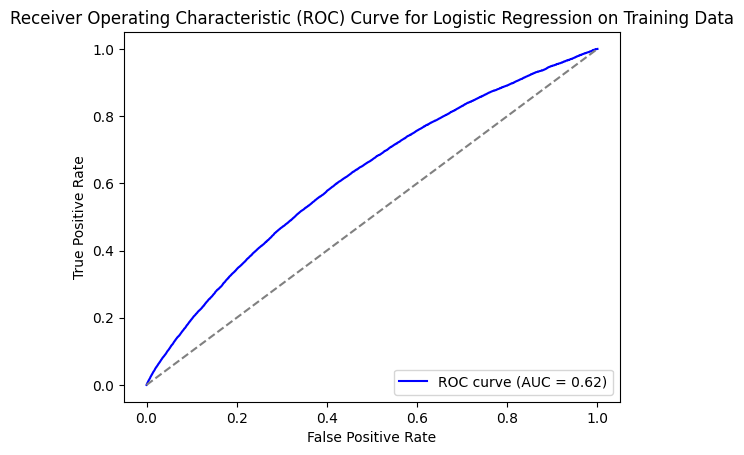

Confusion Matrix for Logistic Regression on Validation Data:


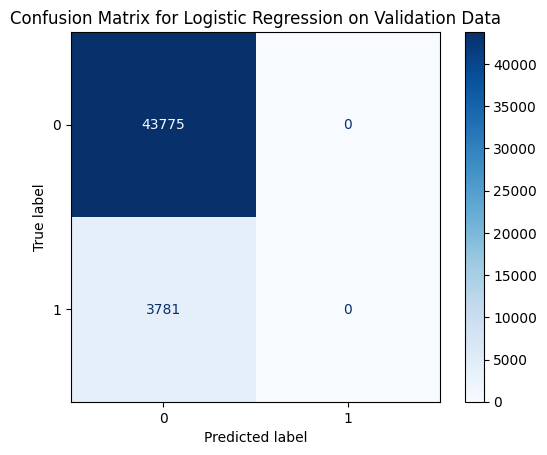

Classification Report for Logistic Regression on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.00      0.00      0.00      3781

    accuracy                           0.92     47556
   macro avg       0.46      0.50      0.48     47556
weighted avg       0.85      0.92      0.88     47556

ROC-AUC for Logistic Regression on Validation Data: 0.6215
Log Loss for Logistic Regression on Validation Data: 0.2718


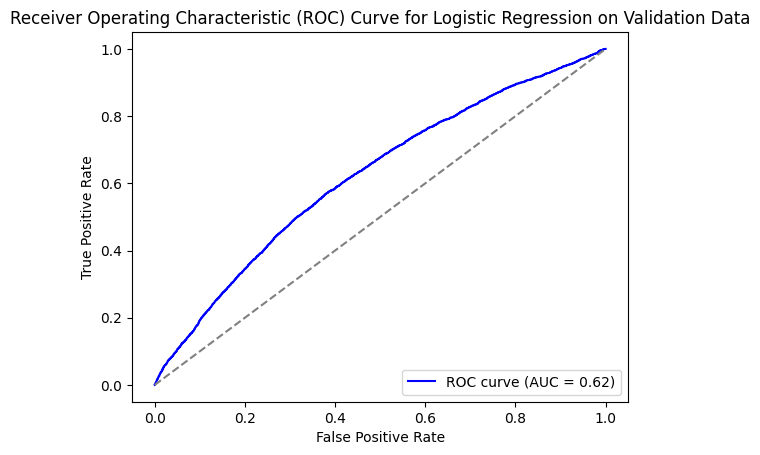



Confusion Matrix for Logistic Regression (L1 - Lasso) on Training Data:


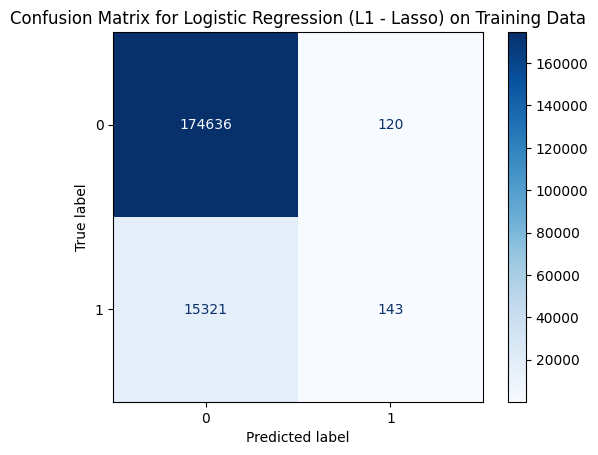

Classification Report for Logistic Regression (L1 - Lasso) on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.54      0.01      0.02     15464

    accuracy                           0.92    190220
   macro avg       0.73      0.50      0.49    190220
weighted avg       0.89      0.92      0.88    190220



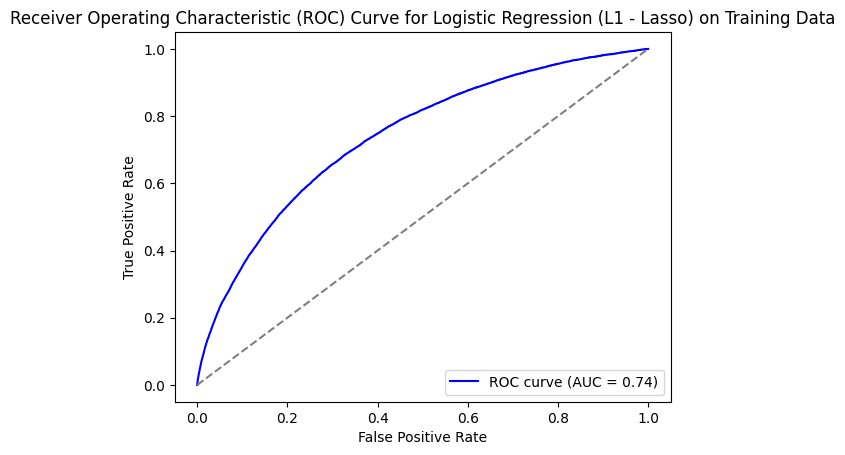

Confusion Matrix for Logistic Regression (L1 - Lasso) on Validation Data:


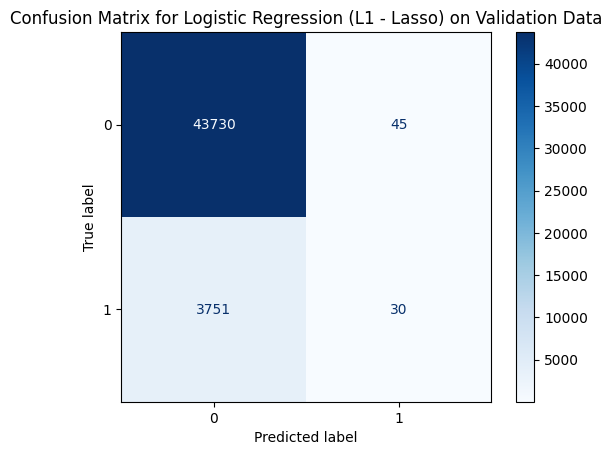

Classification Report for Logistic Regression (L1 - Lasso) on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.40      0.01      0.02      3781

    accuracy                           0.92     47556
   macro avg       0.66      0.50      0.49     47556
weighted avg       0.88      0.92      0.88     47556

ROC-AUC for Logistic Regression (L1 - Lasso) on Validation Data: 0.7465
Log Loss for Logistic Regression (L1 - Lasso) on Validation Data: 0.2475


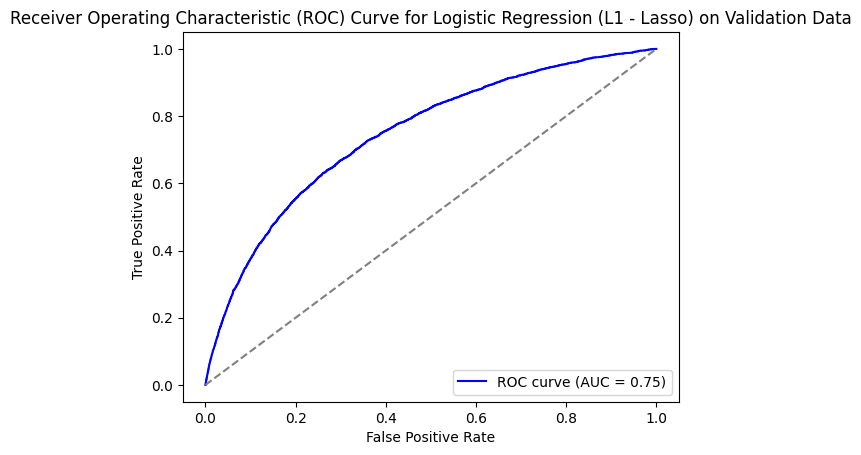



Confusion Matrix for Random Forest on Training Data:


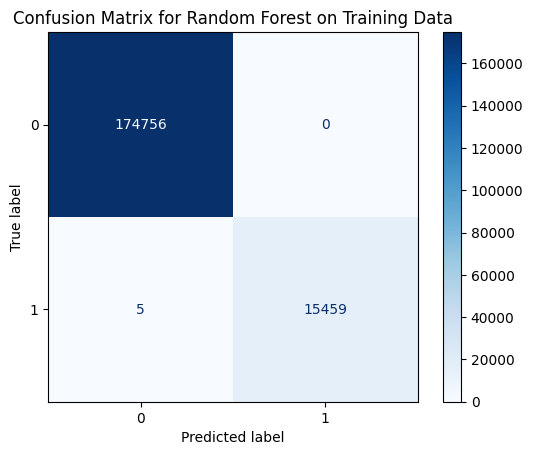

Classification Report for Random Forest on Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174756
           1       1.00      1.00      1.00     15464

    accuracy                           1.00    190220
   macro avg       1.00      1.00      1.00    190220
weighted avg       1.00      1.00      1.00    190220



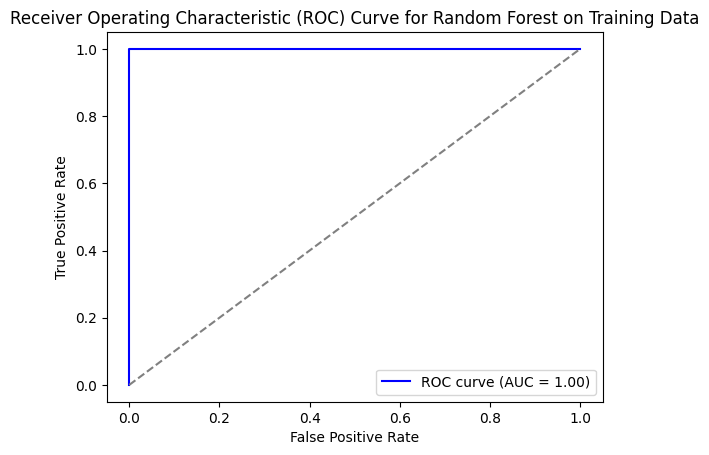

Confusion Matrix for Random Forest on Validation Data:


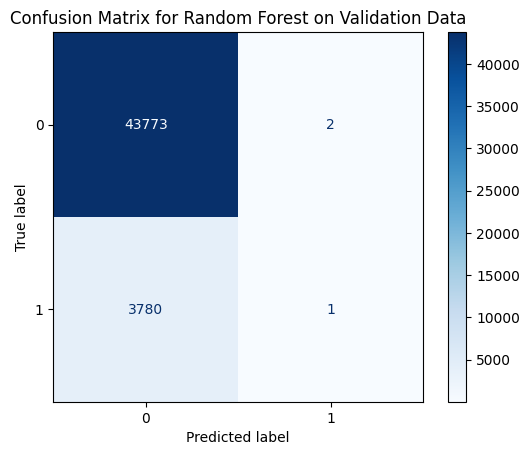

Classification Report for Random Forest on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.33      0.00      0.00      3781

    accuracy                           0.92     47556
   macro avg       0.63      0.50      0.48     47556
weighted avg       0.87      0.92      0.88     47556

ROC-AUC for Random Forest on Validation Data: 0.7158
Log Loss for Random Forest on Validation Data: 0.2678


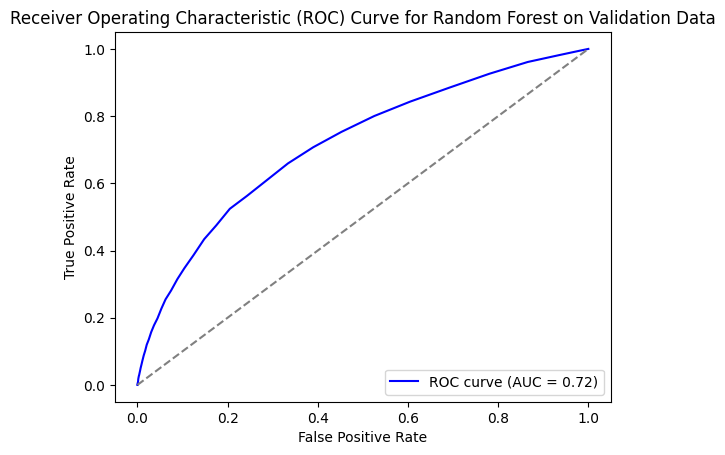



Confusion Matrix for Naive Bayes on Training Data:


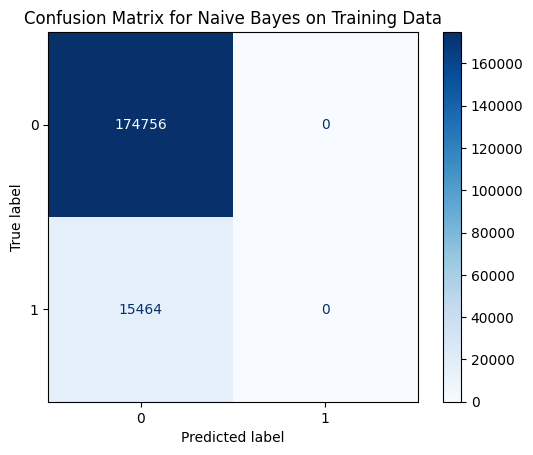

Classification Report for Naive Bayes on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.00      0.00      0.00     15464

    accuracy                           0.92    190220
   macro avg       0.46      0.50      0.48    190220
weighted avg       0.84      0.92      0.88    190220



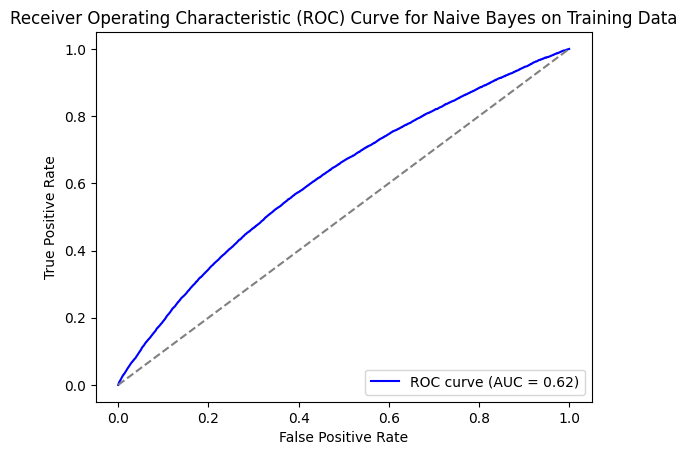

Confusion Matrix for Naive Bayes on Validation Data:


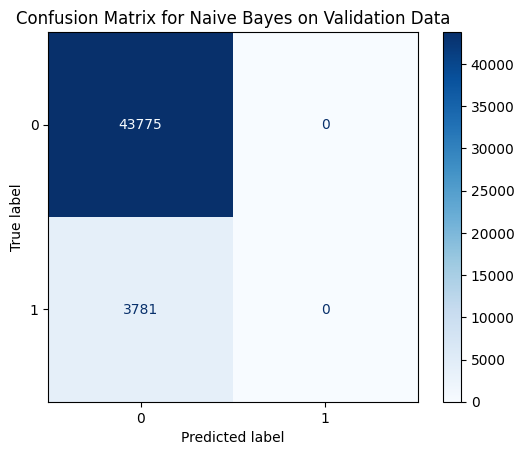

Classification Report for Naive Bayes on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.00      0.00      0.00      3781

    accuracy                           0.92     47556
   macro avg       0.46      0.50      0.48     47556
weighted avg       0.85      0.92      0.88     47556

ROC-AUC for Naive Bayes on Validation Data: 0.6172
Log Loss for Naive Bayes on Validation Data: 0.2836


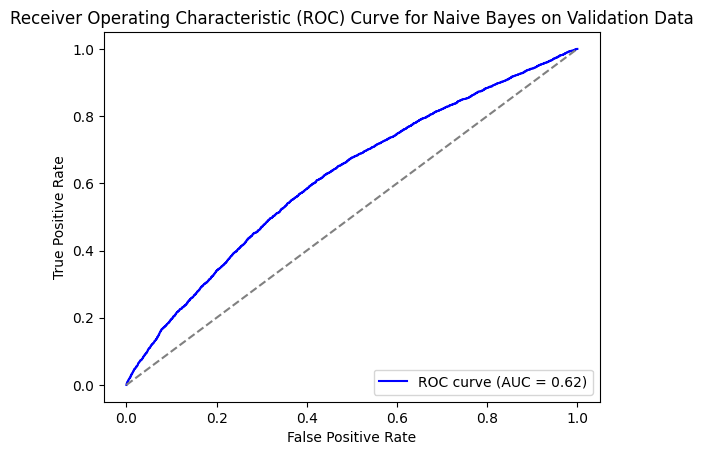



Confusion Matrix for Decision Tree on Training Data:


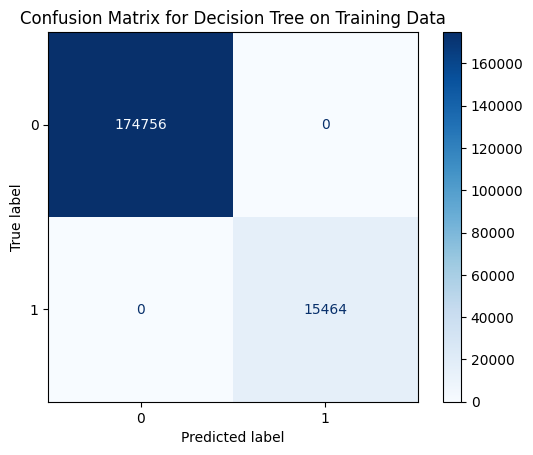

Classification Report for Decision Tree on Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174756
           1       1.00      1.00      1.00     15464

    accuracy                           1.00    190220
   macro avg       1.00      1.00      1.00    190220
weighted avg       1.00      1.00      1.00    190220



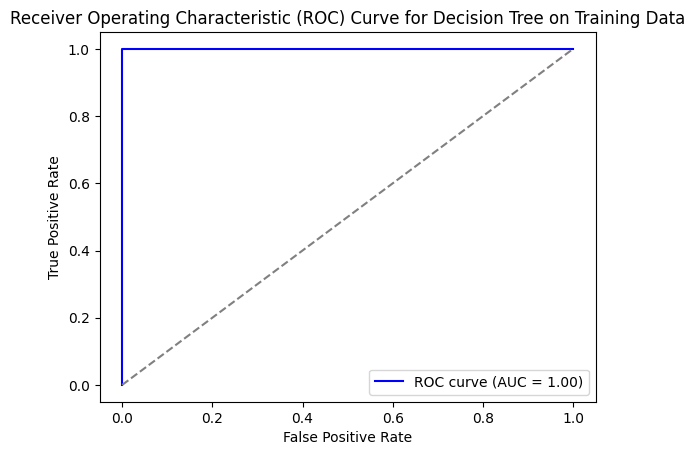

Confusion Matrix for Decision Tree on Validation Data:


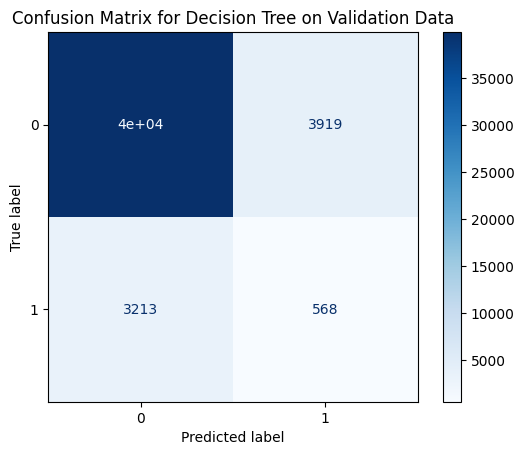

Classification Report for Decision Tree on Validation Data:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     43775
           1       0.13      0.15      0.14      3781

    accuracy                           0.85     47556
   macro avg       0.53      0.53      0.53     47556
weighted avg       0.86      0.85      0.86     47556

ROC-AUC for Decision Tree on Validation Data: 0.5303
Log Loss for Decision Tree on Validation Data: 5.4055


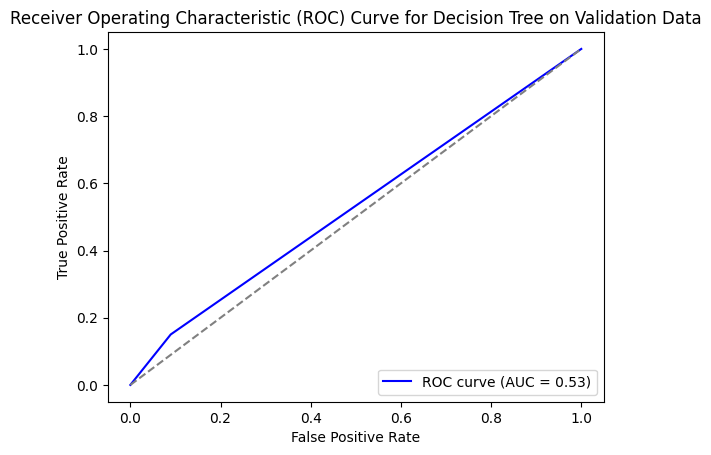



Confusion Matrix for K-Nearest Neighbors on Training Data:


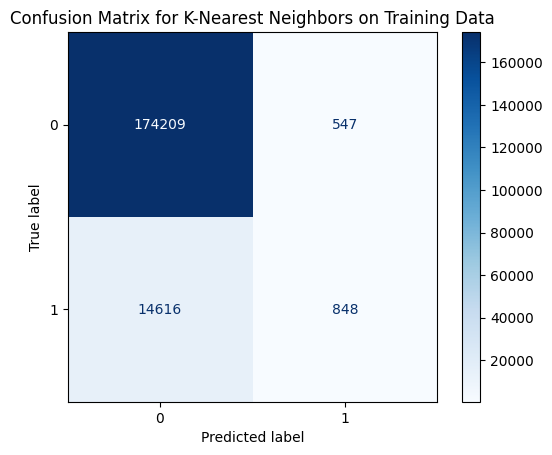

Classification Report for K-Nearest Neighbors on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.61      0.05      0.10     15464

    accuracy                           0.92    190220
   macro avg       0.77      0.53      0.53    190220
weighted avg       0.90      0.92      0.89    190220



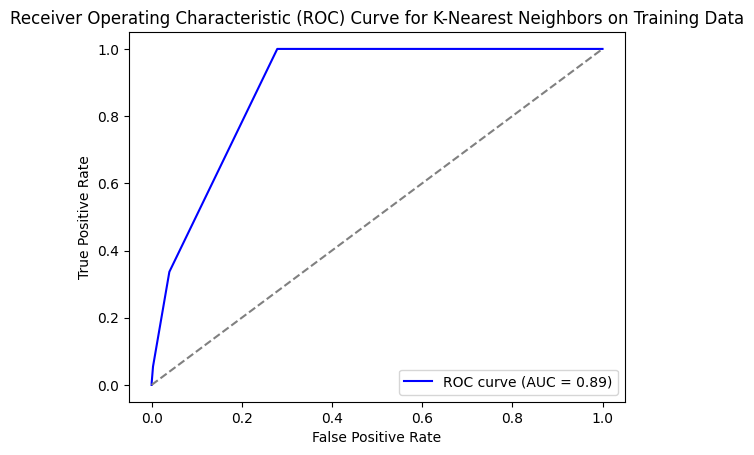

Confusion Matrix for K-Nearest Neighbors on Validation Data:


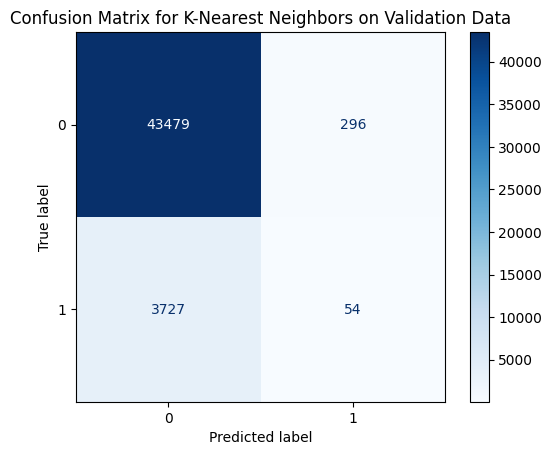

Classification Report for K-Nearest Neighbors on Validation Data:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     43775
           1       0.15      0.01      0.03      3781

    accuracy                           0.92     47556
   macro avg       0.54      0.50      0.49     47556
weighted avg       0.86      0.92      0.88     47556

ROC-AUC for K-Nearest Neighbors on Validation Data: 0.5276
Log Loss for K-Nearest Neighbors on Validation Data: 1.8987


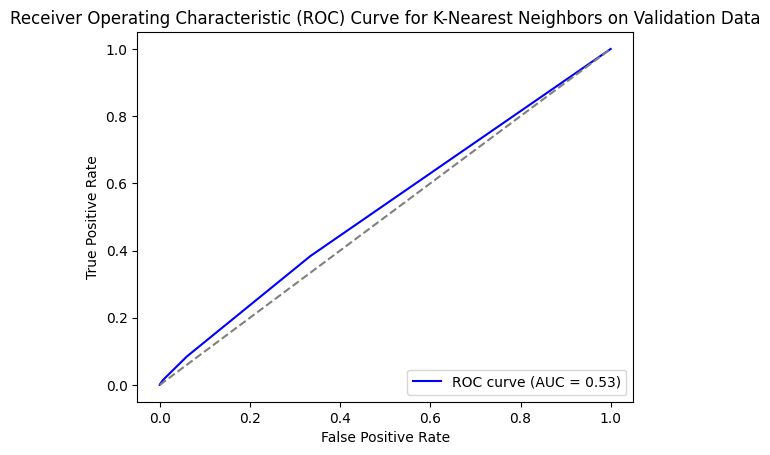



Confusion Matrix for MLP on Training Data:


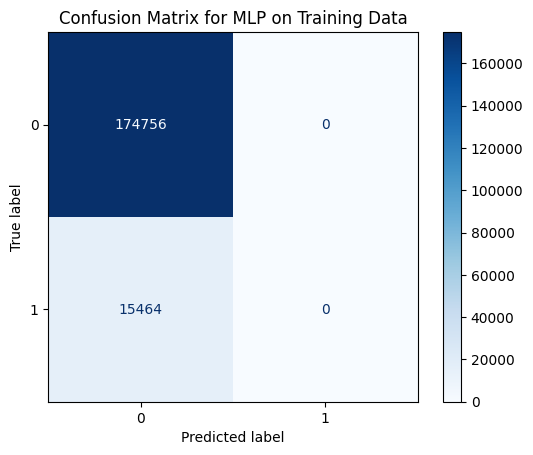

Classification Report for MLP on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.00      0.00      0.00     15464

    accuracy                           0.92    190220
   macro avg       0.46      0.50      0.48    190220
weighted avg       0.84      0.92      0.88    190220



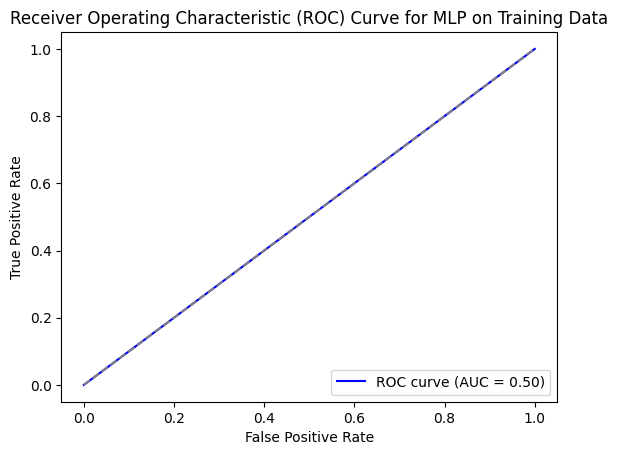

Confusion Matrix for MLP on Validation Data:


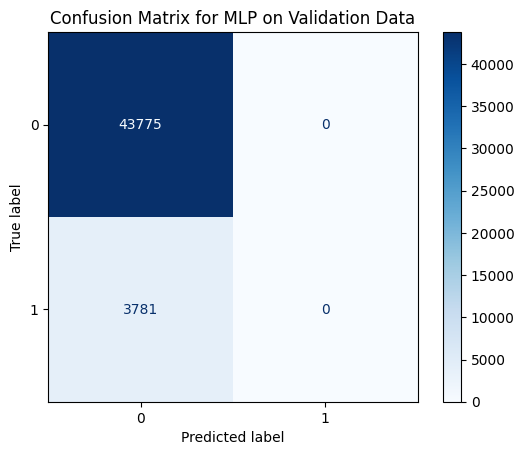

Classification Report for MLP on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.00      0.00      0.00      3781

    accuracy                           0.92     47556
   macro avg       0.46      0.50      0.48     47556
weighted avg       0.85      0.92      0.88     47556

ROC-AUC for MLP on Validation Data: 0.5000
Log Loss for MLP on Validation Data: 0.2778


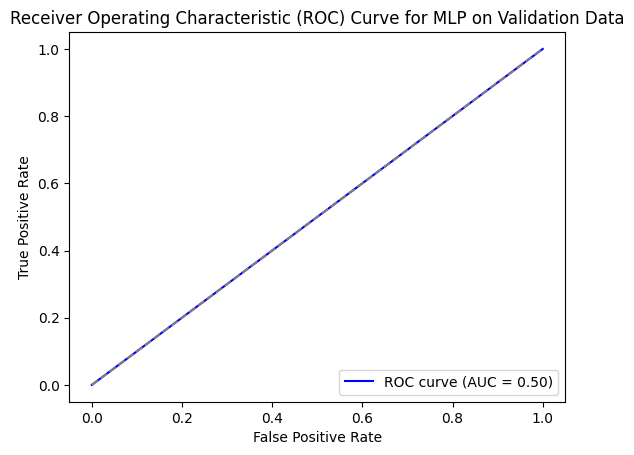



Confusion Matrix for XGBoost on Training Data:


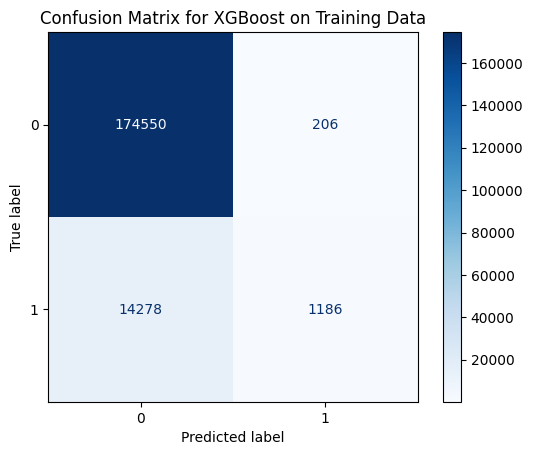

Classification Report for XGBoost on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    174756
           1       0.85      0.08      0.14     15464

    accuracy                           0.92    190220
   macro avg       0.89      0.54      0.55    190220
weighted avg       0.92      0.92      0.89    190220



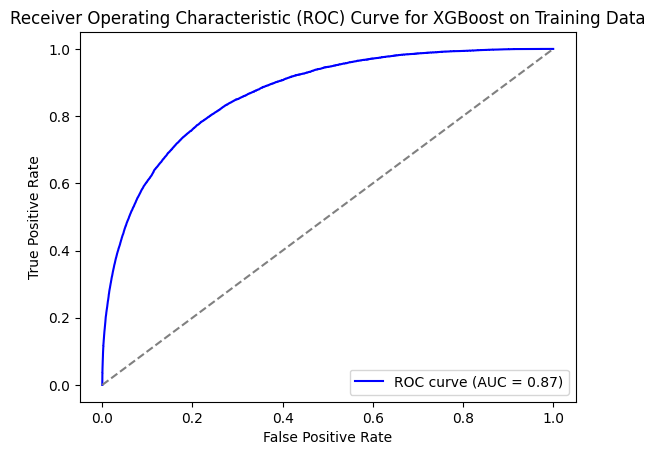

Confusion Matrix for XGBoost on Validation Data:


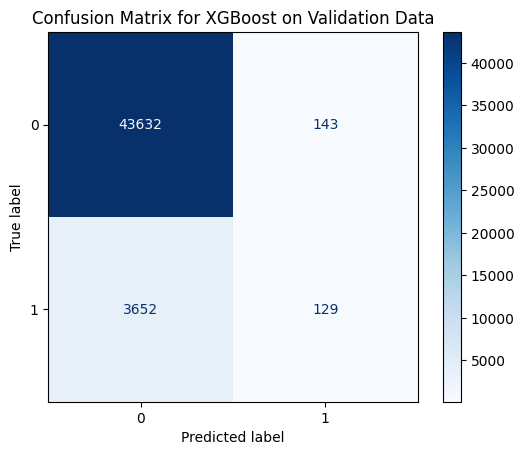

Classification Report for XGBoost on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43775
           1       0.47      0.03      0.06      3781

    accuracy                           0.92     47556
   macro avg       0.70      0.52      0.51     47556
weighted avg       0.89      0.92      0.89     47556

ROC-AUC for XGBoost on Validation Data: 0.7476
Log Loss for XGBoost on Validation Data: 0.2469


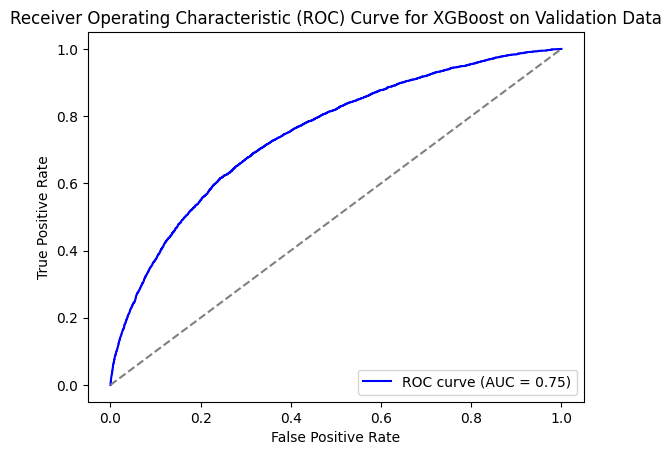

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, log_loss
import matplotlib.pyplot as plt

# Function to plot and display confusion matrix for any model from dictionary
def plot_confusion_matrix_from_dict(model_name, y_data, predictions_dict, data_type):
    cm = confusion_matrix(y_data, predictions_dict[model_name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name} on {data_type}")
    plt.show()

# Function to print classification report for any model from dictionary
def print_classification_report_from_dict(model_name, y_data, predictions_dict, data_type):
    print(f"Classification Report for {model_name} on {data_type}:\n")
    print(classification_report(y_data, predictions_dict[model_name], zero_division=0))


# Function to compute and plot ROC curve with AUC
def plot_roc_curve(model_name, y_true, prob_predictions_dict, data_type):
    # Get the predicted probabilities for the model
    y_pred_proba = prob_predictions_dict[model_name]

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

    # Compute AUC
    auc = roc_auc_score(y_true, y_pred_proba)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name} on {data_type}')
    plt.legend(loc='lower right')
    plt.show()

# Function to calculate and display ROC-AUC and Log Loss for any model from dictionary
def print_roc_auc_and_log_loss(model_name, y_data, predictions_dict, prob_predictions_dict, data_type):
    # Calculate ROC-AUC score (requires predicted probabilities)
    roc_auc = roc_auc_score(y_data, prob_predictions_dict[model_name])
    # Calculate log loss (requires predicted probabilities)
    log_loss_value = log_loss(y_data, prob_predictions_dict[model_name])

    print(f"ROC-AUC for {model_name} on {data_type}: {roc_auc:.4f}")
    print(f"Log Loss for {model_name} on {data_type}: {log_loss_value:.4f}")

# List of models to evaluate
models = [
    'Logistic Regression',
    'Logistic Regression (L1 - Lasso)',
    'Random Forest',
    'Naive Bayes',
    'Decision Tree',
    'K-Nearest Neighbors',
    'MLP',
    'XGBoost'
]

# Evaluate and display results for training data and validation data
print("### Confusion Matrices, Classification Reports, ROC-AUC, and Log Loss for Training Data and Validation Data ###\n")
for model_name in models:
    # Training data
    print(f"Confusion Matrix for {model_name} on Training Data:")
    plot_confusion_matrix_from_dict(model_name, y_train_split, train_predictions, "Training Data")
    print_classification_report_from_dict(model_name, y_train_split, train_predictions, "Training Data")
    plot_roc_curve(model_name, y_train_split, train_prob_predictions, "Training Data")

    # Validation data
    print(f"Confusion Matrix for {model_name} on Validation Data:")
    plot_confusion_matrix_from_dict(model_name, y_val_split, val_predictions, "Validation Data")
    print_classification_report_from_dict(model_name, y_val_split, val_predictions, "Validation Data")
    print_roc_auc_and_log_loss(model_name, y_val_split, val_predictions, val_prob_predictions, "Validation Data")
    plot_roc_curve(model_name, y_val_split, val_prob_predictions, "Validation Data")

    print("\n")

ROC-AUC Performance of Models Before Resampling:

-            The XGBoost shows a strong performance with an AUC of 0.87 and 0.75 on the training and validation sets showing good generalization compared to all other models.
-            The Random Forest and Decision Tree models exhibit perfect AUC scores (1.00) on the training data  but only ~ 0.5 and ~ 0.7 on the test, indicating overfitting and require resampling to better classify the predictions.
-            The Lasso Logistic Regression model shows a notable improvement over standard logistic regression, achieving an AUC of ~ 0.75  making it a decent linear model.
-            The Naive Bayes, MLP, and the Decision Tree models perform poorly on the validation data, as indicated by a lower AUC of ~ 0.5.

The following section shows the confusion matrix and several other metrics for the train and validation sets. A key metric that will be analyzed is the macro average and the weighted average.

The weighted average is used for imbalanced datasets while the macro average is used for balanced datasets. We have included the macro average for reference.

Logistic Regression: Shows comparable performance on all of the metrics from train to test set. Very mild decrease in performance metrics. The weighted average is also very consistent between train and test which indicates that the model is able to maintain performance. It however is terrible at precision, recall and F1 score for the minority classes. (All the metrics are zero.)

Logistic Regression (L1-Lasso):  Shows comparable performance on all of the metrics from train to test set. Very mild decrease in performance metrics. The weighted average is also very consistent between train and test which indicates that the model is able to maintain performance. It does much better than Logistic Regression at precision for the minority class. So out of all of the instances it identifies as zero, it is correct on 86% of them and only correct on 54% when compared to the test set. This is still overfitting but much better than the previous logistic regression model.

Random Forest: Does a really great job for the majority class and only has a slight decrease in accuracy of 8%. The model’s performance however decreases drastically for the minority class.

Naive Bayes: Maintains comparable performance for all of the metrics across train and test. The metrics are also fairly decent w/ precision being .92, recall being 1 and f-score being .96 across the train and test sets. The minority class however is not very great.

KNN: Also maintains fairly comparable performance for the majority class in all the metrics across train and validation. The minority class however has a massive decline. For instance, precision decreases from .61 to .15 for the minority class. (In other words, the amount of predictions that the model thinks are the minority class decreases from train to validation.)  

MLP: Maintains comparable performance for both minority and majority class across all the metrics. The metrics stay the same indicating good generalizability. It however is really bad at the minority class with all of the metrics being zero for the minority class.

XGboost: Also maintains fairly comparable performance for the majority class in all the metrics across train and validation. The minority class however has a massive decline. For instance, precision decreases from .85 to .47 for the minority class. (In other words, the amount of predictions that the model thinks are the minority class decreases from train to validation.) The other metrics like recall are really low with recall on the train being .08 and .03 on the test.

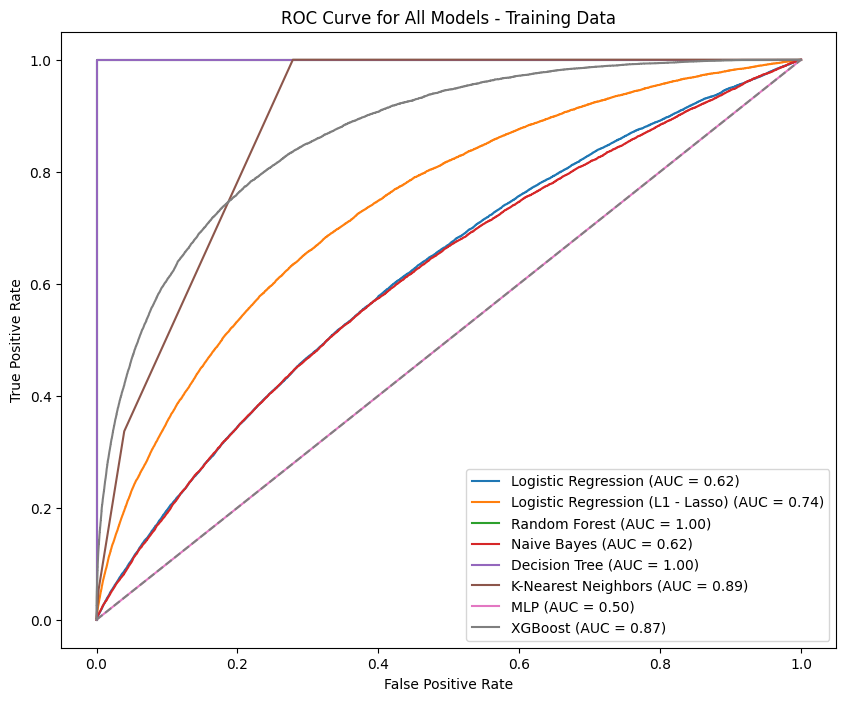

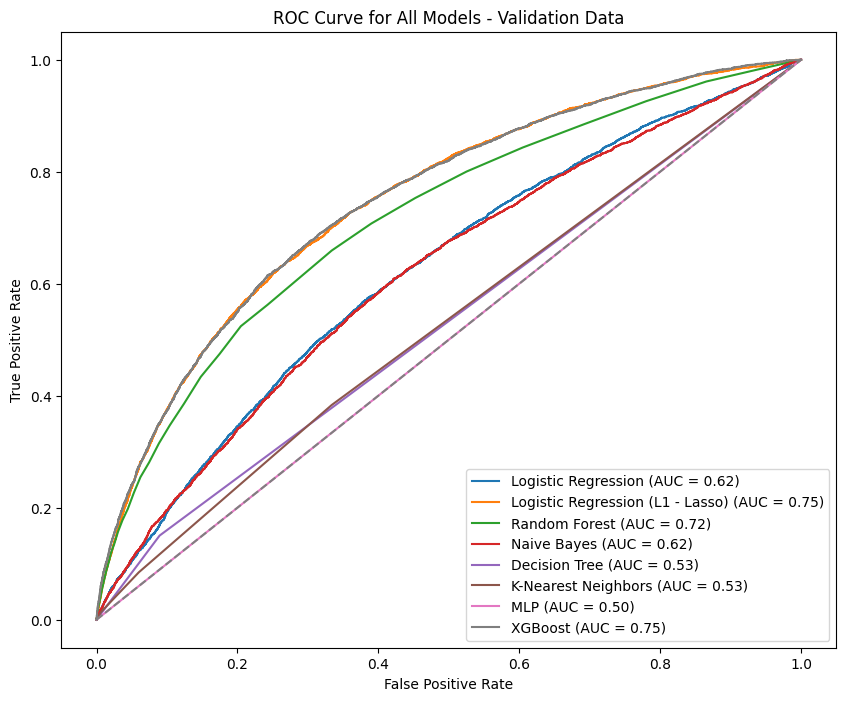

In [ ]:
# Compare the ROC curves for all the models at the same time
# Function to compute ROC curve and plot it
# Function to compute ROC curve and plot it
def plot_all_roc_curve(models, train_true, val_true, train_prob_dict, val_prob_dict):
    # Create a figure for Training data ROC
    plt.figure(figsize=(10, 8))
    for model_name in models:
        train_proba = train_prob_dict[model_name]

        # Compute ROC curve for training data
        fpr_train, tpr_train, _ = roc_curve(train_true, train_proba)
        auc_train = roc_auc_score(train_true, train_proba)

        # Plot ROC curve for training data
        plt.plot(fpr_train, tpr_train, label=f'{model_name} (AUC = {auc_train:.2f})')

    # Plot the diagonal (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Labels and title for training plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for All Models - Training Data')
    plt.legend(loc='lower right')
    plt.show()

    # Create a figure for Validation data ROC
    plt.figure(figsize=(10, 8))
    for model_name in models:
        val_proba = val_prob_dict[model_name]

        # Compute ROC curve for validation data
        fpr_val, tpr_val, _ = roc_curve(val_true, val_proba)
        auc_val = roc_auc_score(val_true, val_proba)

        # Plot ROC curve for validation data
        plt.plot(fpr_val, tpr_val, label=f'{model_name} (AUC = {auc_val:.2f})')

    # Plot the diagonal (random classifier)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Labels and title for validation plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for All Models - Validation Data')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for all models on training and validation data
plot_all_roc_curve(models, y_train_split, y_val_split, train_prob_predictions, val_prob_predictions)

### Discussion:
After evaluating the performance of various models on both the training and validation datasets, we have identified **Random Forest** and **Decision Tree** as the top-performing candidates. However, we observed that the dataset is imbalanced, which could lead to biased results and poor generalization, particularly for the minority class.

To address this, we plan to apply resampling techniques such as undersampling and oversampling to balance the class distribution. This should improve the model's ability to learn from both classes more effectively, ultimately enhancing the overall training quality and predictive performance. By incorporating these resampling strategies, we aim to mitigate the impact of class imbalance and ensure more reliable and accurate model predictions.

## Resampling the training data

In [ ]:
from imblearn.under_sampling import TomekLinks
from joblib import Parallel, delayed
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
# Define a function for parallel processing of Tomek Links
def tomek_resample_chunk(X_chunk, y_chunk):
    tomek = TomekLinks()
    return tomek.fit_resample(X_chunk, y_chunk)

# Split the data into chunks
n_chunks = 4
X_chunks = np.array_split(x_train, n_chunks)
y_chunks = np.array_split(y_train, n_chunks)

# Apply Tomek Links in parallel
resampled_data = Parallel(n_jobs=n_chunks)(
    delayed(tomek_resample_chunk)(X_chunks[i], y_chunks[i]) for i in range(n_chunks)
)

# Recombine the chunks
X_resampled = np.vstack([res[0] for res in resampled_data])
y_resampled = np.hstack([res[1] for res in resampled_data])

print(f"Class distribution after Tomek Links:\n{np.bincount(y_resampled)}")

Class distribution after Tomek Links:
[209522  19245]


In [ ]:
# Apply SMOTE after TomekLinks
smote = SMOTE(random_state=42)
x_resampled_train, y_resampled_train = smote.fit_resample(X_resampled, y_resampled)

In [ ]:
# Split the original training data into a new train and validation set
x_resampled_train_split, x_resampled_val_split, y_resampled_train_split, y_resampled_val_split = train_test_split(x_resampled_train, y_resampled_train, test_size=0.2, random_state=42)

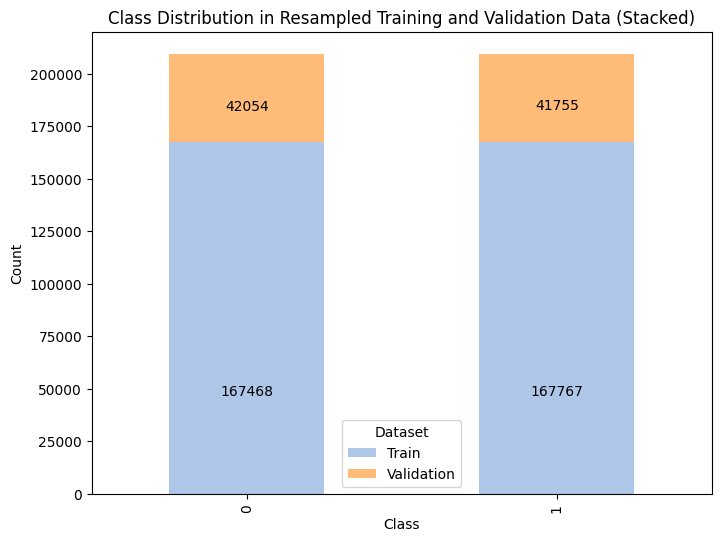

In [ ]:
# Create DataFrames with labels and a 'Dataset' column
y_resampled_train_split_pd = pd.DataFrame({'Class': y_resampled_train_split, 'Dataset': 'Train'})
y_resampled_val_split_pd = pd.DataFrame({'Class': y_resampled_val_split, 'Dataset': 'Validation'})

# Combine both DataFrames
combined_df = pd.concat([y_resampled_train_split_pd, y_resampled_val_split_pd])

# Count the occurrences of each class in the datasets
class_counts = combined_df.groupby(['Class', 'Dataset']).size().unstack(fill_value=0)

# Plot the stacked bar chart with custom colors
ax = class_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#aec7e8', '#ffbb78'])

# Adding title and labels
plt.title("Class Distribution in Resampled Training and Validation Data (Stacked)")
plt.xlabel("Class")
plt.ylabel("Count")

# Annotating the values on top of the stacked bars
for p in ax.patches:
    # Get the height of each segment
    height = p.get_height()
    # Get the x-coordinate of the bar
    x = p.get_x() + p.get_width() / 2
    # Annotate the value at the top of the bar
    ax.annotate(f'{int(height)}',
                xy=(x, p.get_y() + height/4),
                xytext=(0, 5),  # Adjust the text position
                textcoords='offset points',
                ha='center', va='bottom')

# Show the plot
plt.show()


### Learning on resampled data

In [ ]:
# 1. Random Forest Classifier using Resampled Data
rf_clf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_resampled.fit(x_resampled_train_split, y_resampled_train_split)

# Predictions for training and validation data
y_train_pred_rf_resampled = rf_clf_resampled.predict(x_resampled_train_split)
y_val_pred_rf_resampled = rf_clf_resampled.predict(x_resampled_val_split)

# Accuracy for training and validation sets
rf_train_acc_resampled = accuracy_score(y_resampled_train_split, y_train_pred_rf_resampled)
rf_val_acc_resampled = accuracy_score(y_resampled_val_split, y_val_pred_rf_resampled)

print("Random Forest Training Accuracy (Resampled Data):", rf_train_acc_resampled)
print("Random Forest Validation Accuracy (Resampled Data):", rf_val_acc_resampled)

Random Forest Training Accuracy (Resampled Data): 0.9999850850895641
Random Forest Validation Accuracy (Resampled Data): 0.9538355069264638


In [ ]:
# 2. Decision Tree Classifier using Resampled Data
dt_clf_resampled = DecisionTreeClassifier(random_state=42)
dt_clf_resampled.fit(x_resampled_train_split, y_resampled_train_split)

# Predictions for training and validation data
y_train_pred_dt_resampled = dt_clf_resampled.predict(x_resampled_train_split)
y_val_pred_dt_resampled = dt_clf_resampled.predict(x_resampled_val_split)

# Accuracy for training and validation sets
dt_train_acc_resampled = accuracy_score(y_resampled_train_split, y_train_pred_dt_resampled)
dt_val_acc_resampled = accuracy_score(y_resampled_val_split, y_val_pred_dt_resampled)

print("Decision Tree Training Accuracy (Resampled Data):", dt_train_acc_resampled)
print("Decision Tree Validation Accuracy (Resampled Data):", dt_val_acc_resampled)

Decision Tree Training Accuracy (Resampled Data): 1.0
Decision Tree Validation Accuracy (Resampled Data): 0.9096875037287165


In [ ]:
# 3. XGBoost Classifier --18s
xgb_clf_resampled = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf_resampled.fit(x_resampled_train_split, y_resampled_train_split)

y_train_pred_xgb_resampled = xgb_clf_resampled.predict(x_resampled_train_split)
y_val_pred_xgb_resampled = xgb_clf_resampled.predict(x_resampled_val_split)

xgb_train_acc_resampled = accuracy_score(y_resampled_train_split, y_train_pred_xgb_resampled)
xgb_val_acc_resampled = accuracy_score(y_resampled_val_split, y_val_pred_xgb_resampled)

print("XGBoost Training Accuracy (Resampled Data):", xgb_train_acc_resampled)
print("XGBoost Validation Accuracy (Resampled Data):", xgb_val_acc_resampled)


XGBoost Training Accuracy (Resampled Data): 0.9559682014109505
XGBoost Validation Accuracy (Resampled Data): 0.9528332279349473


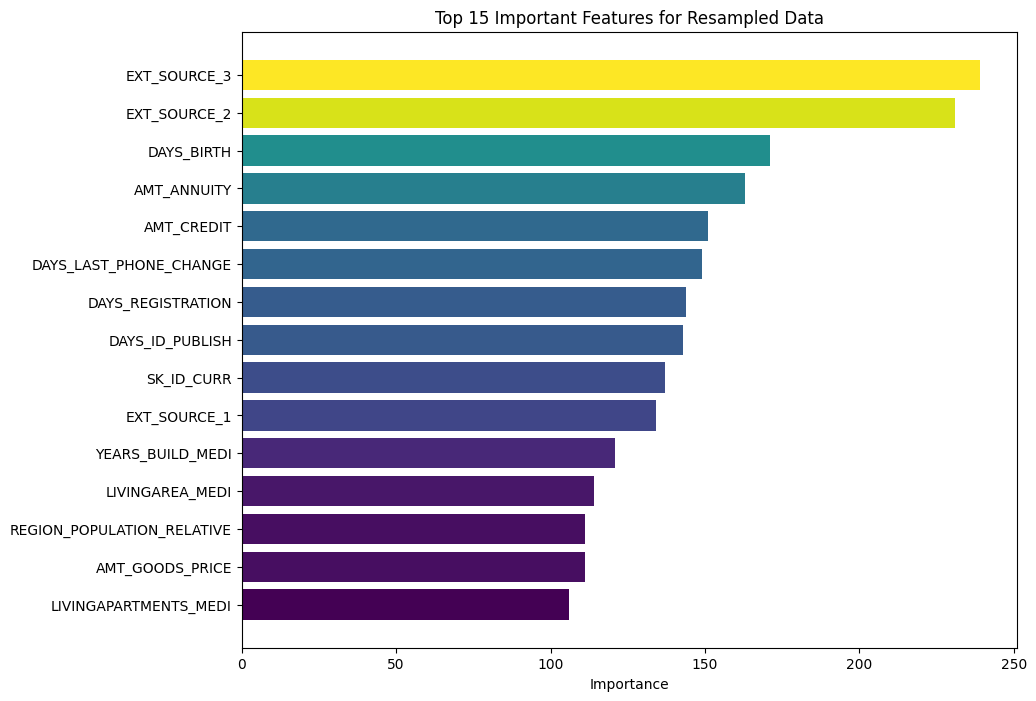

In [ ]:
# Extract feature names from the DataFrame column names
feature_names = train_df.columns.tolist()

# Extract the importance
importance_resampled = xgb_clf_resampled.get_booster().get_score(importance_type='weight')

# Convert importance to a DataFrame for easier handling
importance_resampled_df = pd.DataFrame(list(importance_resampled.items()), columns=['Feature', 'Importance'])

# Map the numeric feature names to real column names from train_df
# This assumes that features are indexed starting from 'f0', 'f1', ...
importance_resampled_df['Feature'] = importance_resampled_df['Feature'].apply(lambda x: feature_names[int(x[1:])])

# Sort the values
importance_resampled_df = importance_resampled_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
top_features_resampled = importance_resampled_df.head(15)

# Plotting with a color gradient
plt.figure(figsize=(10, 8))

# Normalize the feature importance values to get colors
norm_resampled = plt.Normalize(top_features_resampled['Importance'].min(), top_features_resampled['Importance'].max())
sm_resampled = plt.cm.ScalarMappable(cmap="viridis", norm=norm_resampled)  # You can change 'viridis' to any other colormap

# Use the normalized importance values to get the color values for each feature
colors_resampled = plt.cm.viridis(norm_resampled(top_features_resampled['Importance']))

# Create a horizontal bar plot with the color gradient
plt.barh(top_features_resampled['Feature'], top_features_resampled['Importance'], color=colors_resampled)


# Plot labels and title
plt.xlabel('Importance')
plt.title('Top 15 Important Features for Resampled Data')
plt.gca().invert_yaxis()  # Highest importance on top

plt.show()


### Confusion Matrices and Classification Reports for Resampled Training Data and Validation Data ###

Confusion Matrix for Random Forest on Training Data:


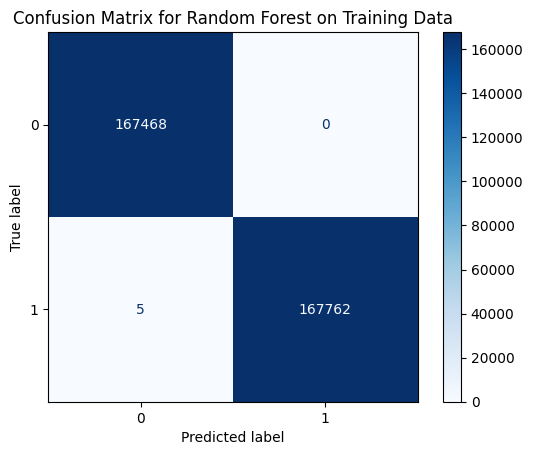

Classification Report for Random Forest on Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167468
           1       1.00      1.00      1.00    167767

    accuracy                           1.00    335235
   macro avg       1.00      1.00      1.00    335235
weighted avg       1.00      1.00      1.00    335235

ROC-AUC for Random Forest on Validation Data: 1.0000
Log Loss for Random Forest on Validation Data: 0.0399


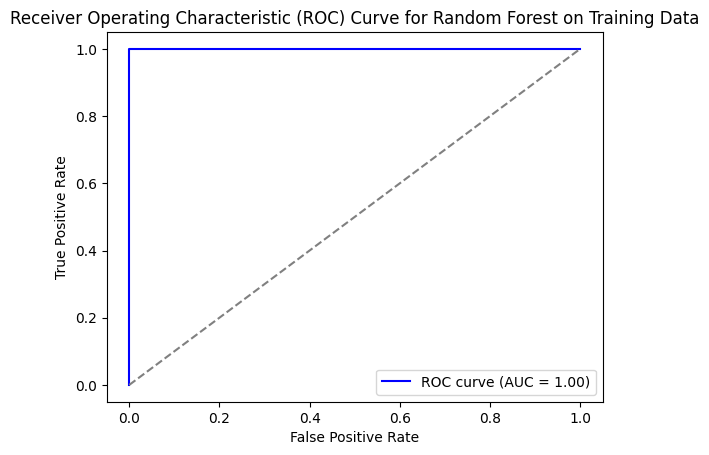

Confusion Matrix for Random Forest on Validation Data:


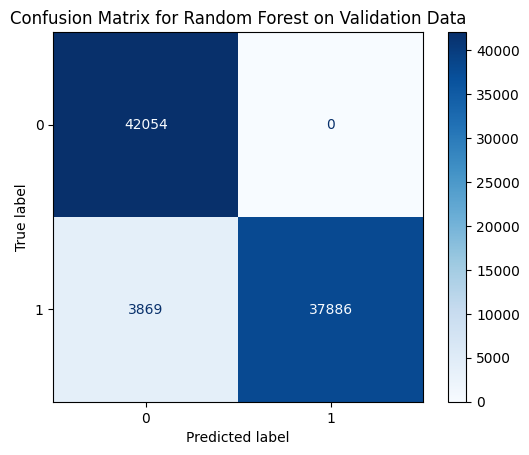

Classification Report for Random Forest on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42054
           1       1.00      0.91      0.95     41755

    accuracy                           0.95     83809
   macro avg       0.96      0.95      0.95     83809
weighted avg       0.96      0.95      0.95     83809

ROC-AUC for Random Forest on Validation Data: 0.9772
Log Loss for Random Forest on Validation Data: 0.1553


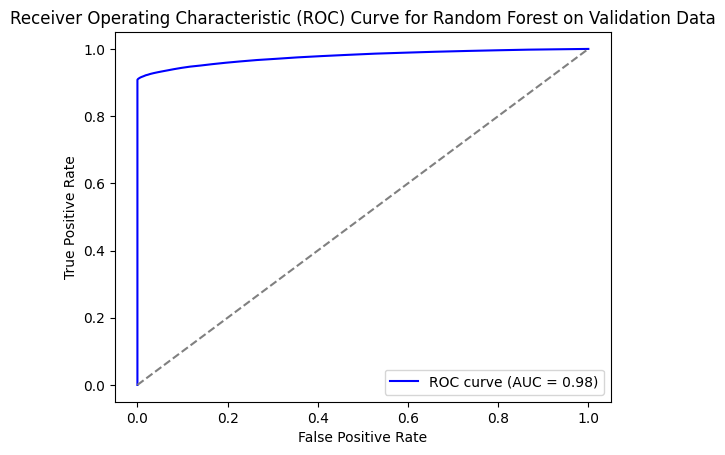



Confusion Matrix for Decision Tree on Training Data:


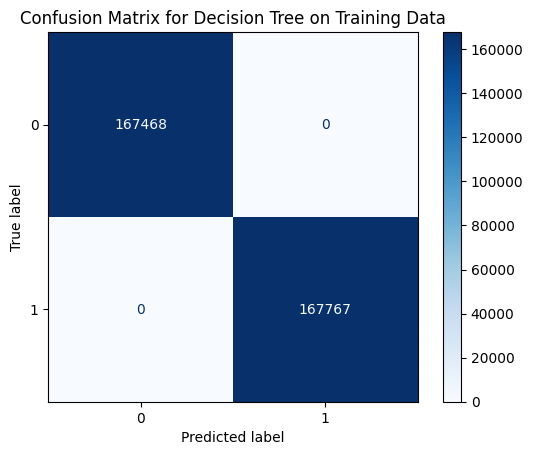

Classification Report for Decision Tree on Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167468
           1       1.00      1.00      1.00    167767

    accuracy                           1.00    335235
   macro avg       1.00      1.00      1.00    335235
weighted avg       1.00      1.00      1.00    335235

ROC-AUC for Decision Tree on Validation Data: 1.0000
Log Loss for Decision Tree on Validation Data: 0.0000


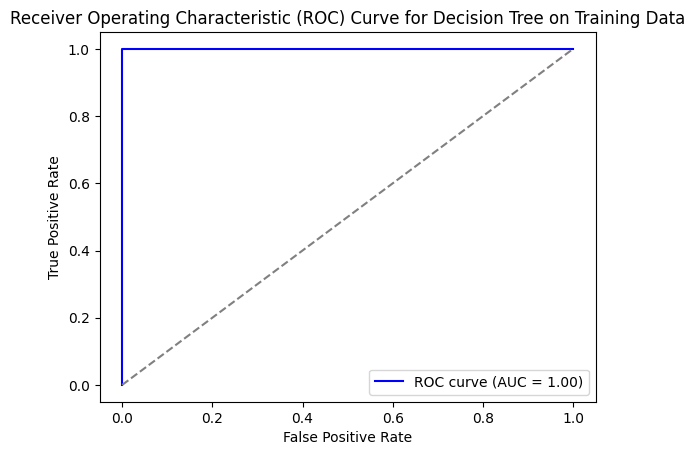

Confusion Matrix for Decision Tree on Validation Data:


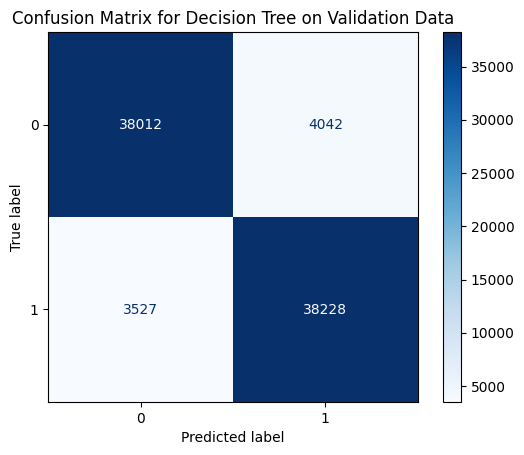

Classification Report for Decision Tree on Validation Data:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     42054
           1       0.90      0.92      0.91     41755

    accuracy                           0.91     83809
   macro avg       0.91      0.91      0.91     83809
weighted avg       0.91      0.91      0.91     83809

ROC-AUC for Decision Tree on Validation Data: 0.9097
Log Loss for Decision Tree on Validation Data: 3.2552


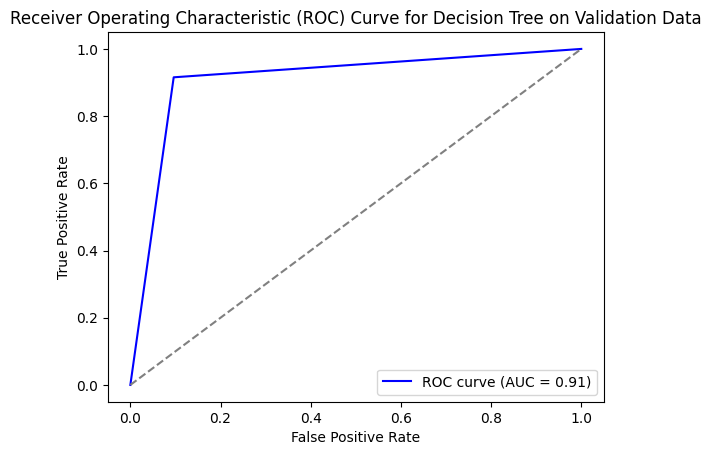



Confusion Matrix for XGBoost on Training Data:


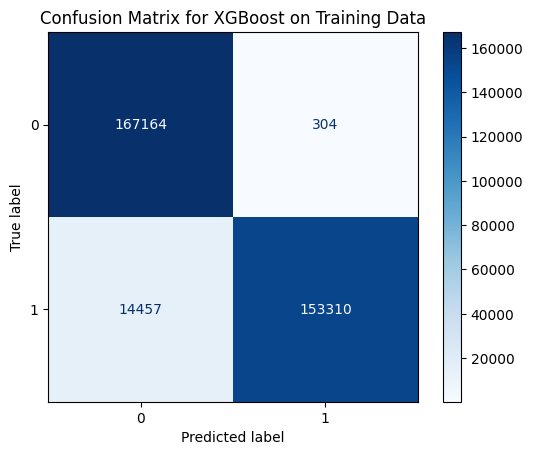

Classification Report for XGBoost on Training Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    167468
           1       1.00      0.91      0.95    167767

    accuracy                           0.96    335235
   macro avg       0.96      0.96      0.96    335235
weighted avg       0.96      0.96      0.96    335235

ROC-AUC for XGBoost on Validation Data: 0.9860
Log Loss for XGBoost on Validation Data: 0.1222


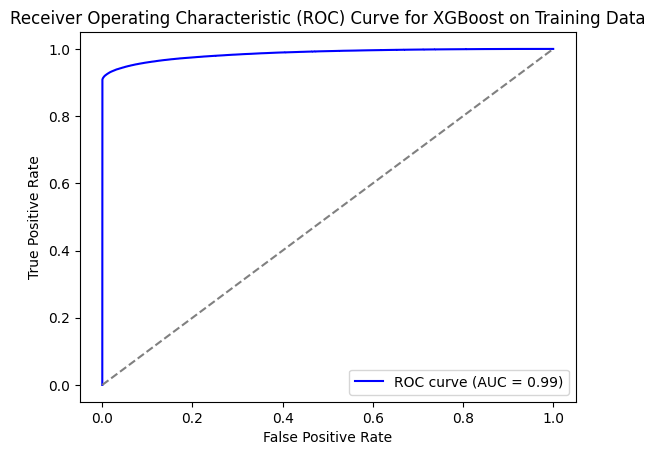

Confusion Matrix for XGBoost on Validation Data:


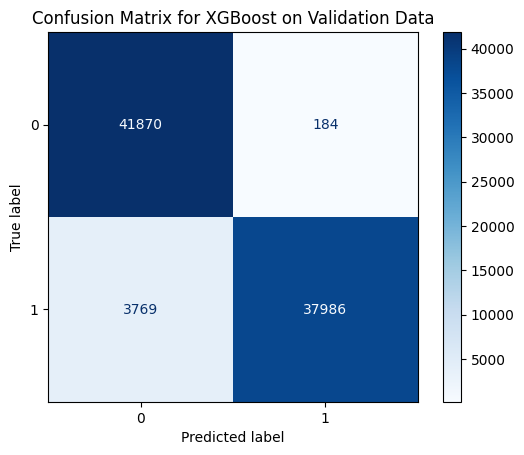

Classification Report for XGBoost on Validation Data:

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     42054
           1       1.00      0.91      0.95     41755

    accuracy                           0.95     83809
   macro avg       0.96      0.95      0.95     83809
weighted avg       0.96      0.95      0.95     83809

ROC-AUC for XGBoost on Validation Data: 0.9769
Log Loss for XGBoost on Validation Data: 0.1422


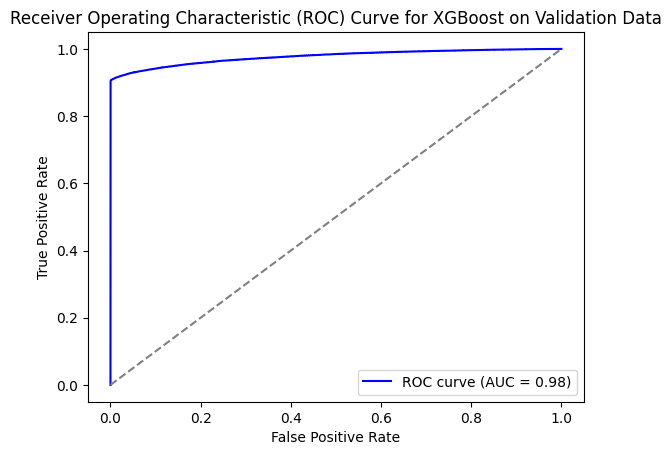

In [ ]:
# Initialize dictionaries to store results
train_resampled_predictions = {}
train_resampled_accuracies = {}
val_resampled_predictions = {}
val_resampled_accuracies = {}

# Store training and validation predictions in dictionaries
train_resampled_predictions['Random Forest'] = y_train_pred_rf_resampled
train_resampled_accuracies['Random Forest'] = rf_train_acc_resampled
val_resampled_predictions['Random Forest'] = y_val_pred_rf_resampled
val_resampled_accuracies['Random Forest'] = rf_val_acc_resampled

train_resampled_predictions['Decision Tree'] = y_train_pred_dt_resampled
train_resampled_accuracies['Decision Tree'] = dt_train_acc_resampled
val_resampled_predictions['Decision Tree'] = y_val_pred_dt_resampled
val_resampled_accuracies['Decision Tree'] = dt_val_acc_resampled

train_resampled_accuracies['XGBoost'] = xgb_train_acc_resampled
val_resampled_accuracies['XGBoost'] = xgb_val_acc_resampled
train_resampled_predictions['XGBoost'] = y_train_pred_xgb_resampled
val_resampled_predictions['XGBoost'] = y_val_pred_xgb_resampled


# Generate predicted probabilities for each model
train_resampled_prob_predictions = {
    'Random Forest': rf_clf_resampled.predict_proba(x_resampled_train_split)[:, 1],
    'Decision Tree': dt_clf_resampled.predict_proba(x_resampled_train_split)[:, 1],
    'XGBoost': xgb_clf_resampled.predict_proba(x_resampled_train_split)[:, 1]
}

val_resampled_prob_predictions = {
    'Random Forest': rf_clf_resampled.predict_proba(x_resampled_val_split)[:, 1],
    'Decision Tree': dt_clf_resampled.predict_proba(x_resampled_val_split)[:, 1],
    'XGBoost': xgb_clf_resampled.predict_proba(x_resampled_val_split)[:, 1]
}


# List of models to evaluate
models_resampled = [
    'Random Forest',
    'Decision Tree',
    'XGBoost'
]

# Evaluate and display results for training data and validation data
print("### Confusion Matrices and Classification Reports for Resampled Training Data and Validation Data ###\n")
for model_name in models_resampled:
    # Resampled Training data
    print(f"Confusion Matrix for {model_name} on Training Data:")
    plot_confusion_matrix_from_dict(model_name, y_resampled_train_split, train_resampled_predictions, "Training Data")
    print_classification_report_from_dict(model_name, y_resampled_train_split, train_resampled_predictions, "Training Data")
    print_roc_auc_and_log_loss(model_name, y_resampled_train_split, train_resampled_predictions, train_resampled_prob_predictions, "Validation Data")
    plot_roc_curve(model_name, y_resampled_train_split, train_resampled_prob_predictions, "Training Data")

    # Resampled Validation data
    print(f"Confusion Matrix for {model_name} on Validation Data:")
    plot_confusion_matrix_from_dict(model_name, y_resampled_val_split, val_resampled_predictions, "Validation Data")
    print_classification_report_from_dict(model_name, y_resampled_val_split, val_resampled_predictions, "Validation Data")
    print_roc_auc_and_log_loss(model_name, y_resampled_val_split, val_resampled_predictions, val_resampled_prob_predictions, "Validation Data")
    plot_roc_curve(model_name, y_resampled_val_split, val_resampled_prob_predictions, "Validation Data")

    print("\n")

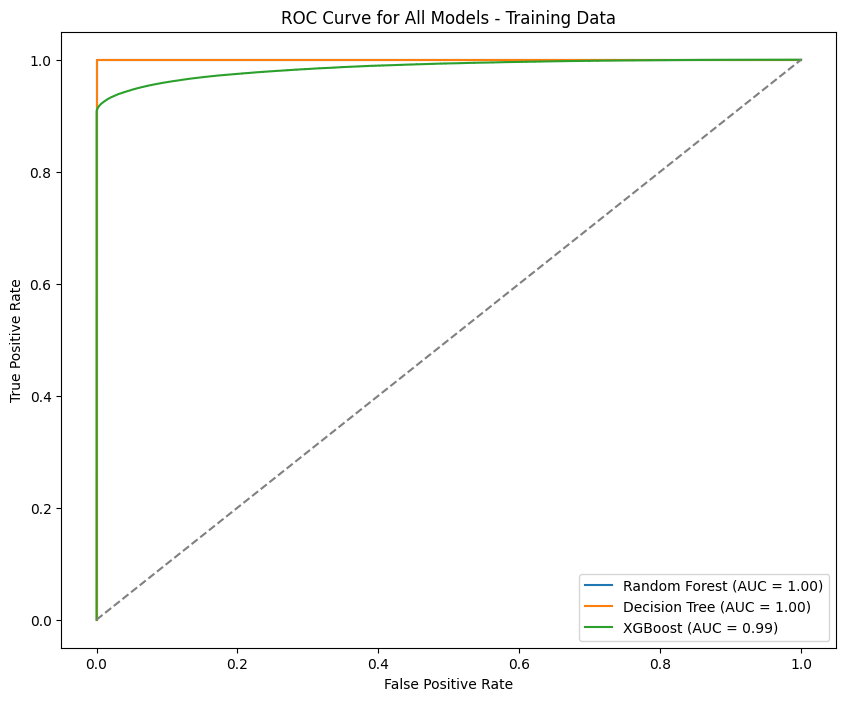

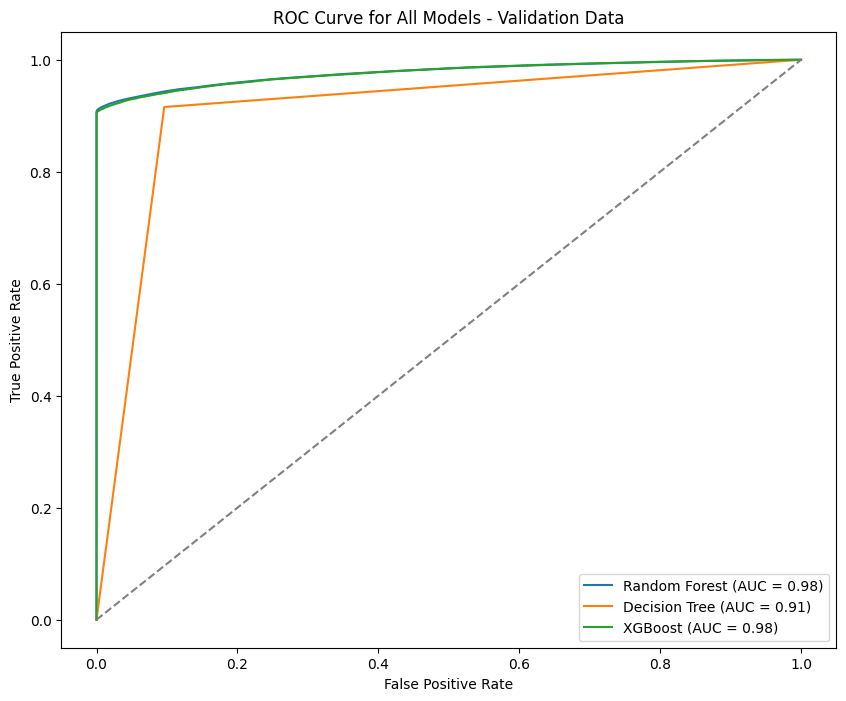

In [ ]:
# Plot ROC curve for all models on resampled training and validation data
plot_all_roc_curve(models_resampled, y_resampled_train_split, y_resampled_val_split, train_resampled_prob_predictions, val_resampled_prob_predictions)

The resampling has been successful with the Random Forest, Decision Tree and XGBoost showing strong generalizability and only a mild decrease of 4-5% between train and validation tests. The minority class is also pretty good as well. For instance, Random Forest has a .92 precision on train and then 1 on precision for the validation sets. The other models also showcase similar improvements.


## Make predictions on test data and Peak the results

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

models_trained = [
    ('Logistic Regression', log_reg),
    ('Logistic Regression (L1 - Lasso)', log_reg_l1),
    ('Random Forest', rf_clf),
    ('Naive Bayes', nb_clf),
    ('Decision Tree', dt_clf),
    ('KNN', knn_clf),
    ('MLP', mlp_clf),
    ('XGBoost', xgb_clf),
    ('Random Forest Resampled', rf_clf_resampled),
    ('Decision Tree Resampled', dt_clf_resampled),
    ('XGBoost Resampled', xgb_clf_resampled)
]

for model in models_trained:
    model_name, model_instance = model
    y_test_pred = model_instance.predict_proba(x_test)[:,1]

    # Assuming y_train_split is the target labels for training data
    #y_test_df = pd.DataFrame({'Class': y_test_pred})

    # Count the occurrences of each class
    #class_counts = y_test_df['Class'].value_counts().sort_index()

    # Plot the bar chart
    #ax = class_counts.plot(kind='bar', figsize=(8, 6), color='#1f77b4')

    # Adding title and labels
    #plt.title(f"Predicted Class Distribution in Testing Data by {model_name}")
    #plt.xlabel("Class")
    #plt.ylabel("Count")

    # Annotating the values on top of the bars
    #for p in ax.patches:
        # Get the height of each bar
        #height = p.get_height()
        # Annotate the value at the top of the bar
        #ax.annotate(f'{int(height)}',
                    #xy=(p.get_x() + p.get_width() / 2, height),
                    #xytext=(0, 5),  # Offset the text
                    #textcoords='offset points',
                    #ha='center', va='bottom')

    # Show the plot
    #plt.show()

    # Create a DataFrame for submission
    # Replace 'Id' with the actual name of the ID column if provided in the test set
    submission_df = pd.DataFrame({
        'SK_ID_CURR': test_df['SK_ID_CURR'].astype(int),  # Assuming test_df has an 'Id' column. Modify accordingly.
        'TARGET': y_test_pred.astype(float)
    })

    # Export the DataFrame to a CSV file for submission
    submission_df.to_csv(f'kaggle_submission_{model_name}.csv', index=False)

    print(f"Submission file created: 'kaggle_submission_{model_name}.csv'")


Submission file created: 'kaggle_submission_Logistic Regression.csv'
Submission file created: 'kaggle_submission_Logistic Regression (L1 - Lasso).csv'
Submission file created: 'kaggle_submission_Random Forest.csv'
Submission file created: 'kaggle_submission_Naive Bayes.csv'
Submission file created: 'kaggle_submission_Decision Tree.csv'
Submission file created: 'kaggle_submission_KNN.csv'
Submission file created: 'kaggle_submission_MLP.csv'
Submission file created: 'kaggle_submission_XGBoost.csv'
Submission file created: 'kaggle_submission_Random Forest Resampled.csv'
Submission file created: 'kaggle_submission_Decision Tree Resampled.csv'
Submission file created: 'kaggle_submission_XGBoost Resampled.csv'


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

models_trained = [
    ('Logistic Regression', log_reg),
    ('Logistic Regression (L1 - Lasso)', log_reg_l1)
]

for model in models_trained:
    model_name, model_instance = model
    y_test_pred = model_instance.predict_proba(x_test)[:,1]

    # Assuming y_train_split is the target labels for training data
    #y_test_df = pd.DataFrame({'Class': y_test_pred})

    # Count the occurrences of each class
    #class_counts = y_test_df['Class'].value_counts().sort_index()

    # Plot the bar chart
    #ax = class_counts.plot(kind='bar', figsize=(8, 6), color='#1f77b4')

    # Adding title and labels
    #plt.title(f"Predicted Class Distribution in Testing Data by {model_name}")
    #plt.xlabel("Class")
    #plt.ylabel("Count")

    # Annotating the values on top of the bars
    #for p in ax.patches:
        # Get the height of each bar
        #height = p.get_height()
        # Annotate the value at the top of the bar
        #ax.annotate(f'{int(height)}',
                    #xy=(p.get_x() + p.get_width() / 2, height),
                    #xytext=(0, 5),  # Offset the text
                    #textcoords='offset points',
                    #ha='center', va='bottom')

    # Show the plot
    #plt.show()

    # Create a DataFrame for submission
    # Replace 'Id' with the actual name of the ID column if provided in the test set
    submission_df = pd.DataFrame({
        'SK_ID_CURR': test_df['SK_ID_CURR'].astype(int),  # Assuming test_df has an 'Id' column. Modify accordingly.
        'TARGET': y_test_pred.astype(float)
    })

    # Export the DataFrame to a CSV file for submission
    submission_df.to_csv(f'kaggle_submission_{model_name}.csv', index=False)

    print(f"Submission file created: 'kaggle_submission_{model_name}.csv'")


Submission file created: 'kaggle_submission_Logistic Regression.csv'
Submission file created: 'kaggle_submission_Logistic Regression (L1 - Lasso).csv'





# Logistic Regression(L1 - Lasso):
The overall Kaggle score was 0.72820, which achieves the highest accuracy across all the models we considered. While this model only had an AUC of 0.74 for the train set and of 0.75 on the validation data, this is a very modest decline and it suggests that the model is generalizing quite well to unseen data. It’s also higher than a random classifier (Kaggle Score: 0.50) which suggests that this model is fairly decent at differentiating between the positive and negative classes.

# XGBoost:
This is a fairly good model with a Kaggle score of 0.72235 and an AUC of 0.75 on the validation set. This indicates that the model is generalizing well to unseen data.

# Resampled XGBoost:
After training on resampled data, XGBoost achieved a Kaggle score of 0.72447. Notably, the resampled XGBoost model had an AUC of 0.99 on the resampled training data and 0.98 on the validation data. This demonstrates that resampling significantly helps the XGBoost model generalize better to unseen data. The improved Kaggle score aligns with this observation, confirming that resampling improves model performance on test data as well.


Random Forest: 0.68575

Random Forest (Resampled): 0.67885

Logistic Regression: 0.62108

Naive Bayes: 0.60178

Decision Tree Resampled: 0.53726

Decision Tree: 0.52951

KNN: 0.52637

MLP: 0.50022

Overall this was a very informative experience and we gained a lot of knowledge from the modeling process. For instance, we learned from the XGboost model that the top 5 predictors are Ext_Source_3, `Ext_Source_2`, `Days_Birth` and `Amt_Annuity`. This suggests that Home Credit should analyze these factors more critically when giving out loans. For instance, perhaps younger people have more difficulties with paying back loans compared to older people. This could be because they are just beginning their financial journey.







# Group Contribution:


- Jocelyn Chang:
    - Logistic Regression (w/ and w/o regularization), ANN models (MLP), Naive Bayes and KNN Models, Feature Engineering, Final Notebook Preparation and Edits, Table of Contents, ROC-AUC Curves, Confusion Matrices, Resampling, Summaries, Final Test set and Kaggle Results

- Nikita Muddapati:
    - Graphs of imbalance and non-linear, Upsampling, XGboost, Tuned XGboost, Feature Importance, Interpretations, Summaries

- Varun Selvam:
    - Data Preparation, EDA, Outlier Analysis, Naive Bayes, Random forest, Decision Trees, Interpretations, Summaries, Final Test set and Kaggle Results

- Meenakshi Hariharan:
    - Feature Engineering, KNN Models, XGboost, Interpretations, Summaries

